ref: https://dacon.io/competitions/official/235743/codeshare

In [192]:
! pip install pycaret

In [193]:
! pip install optuna

     |████████████████████████████████| 308 kB 5.2 MB/s 
     |████████████████████████████████| 81 kB 6.1 MB/s 
     |████████████████████████████████| 150 kB 58.1 MB/s 
     |████████████████████████████████| 113 kB 56.4 MB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=637223fdbfe1bd85280b794222c4711c445f2748934bf71ff6d25342e18444f5
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [194]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [195]:
# 제출용

In [196]:
# train, test=my_split(train_test)
# model_list=[LinearRegression(),Lasso(),ElasticNet(),Ridge(), XGBRegressor(),LGBMRegressor()]

# #----------------------------------------------- 하단 코드 동일
# y = train['중식계']
# X = train.drop(['중식계','석식계'], axis=1)

# X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)
# model= LGBMRegressor()
# for model in model_list:
#     model.fit(X_train, y_train)
#     pred = model.predict(X_val)
#     mae = mean_absolute_error(y_val, pred)
#     print(f" MAE:{mae:.4f} {model.__class__.__name__}") 


# #------------------------------------------------- 공모전 제출용 학습
# test_pred = model.predict(test)        #---------->  submit 제출 답안
# test_pred = np.round(test_pred, 0).astype(int)

# #------------------------------------------------- 제출 전 확인
# print(len(test_pred), test_pred)
# print(sub['중식계'].min(), sub['중식계'].max())
# print(test.index.values.min()   , test.index.values.max())
# sub.head(1)
# #------------------------------------------------- 답안지 작성
# sub['중식계'] = test_pred.reshape(-1,1)
# print(sub.head(2))
# sub.to_csv("v02.csv", index=False)   

## target feature

In [197]:
# from matplotlib import font_manager, rc
# font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)

# train.profile_report()

In [198]:
# from matplotlib import font_manager, rc
# font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)

# train_test.profile_report()

In [199]:
# 분석
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

# 경고
import warnings
warnings.filterwarnings(action='ignore')

# 날짜 가공
import datetime as dt 
from dateutil.rrule import rrule, YEARLY, MONTHLY, WEEKLY

# visualization
import matplotlib.pyplot as plt
from matplotlib import rc
# plt.rc('font', family='Gothic') # For Windows. PLOT에서 한글 처리 -> 플롯 만드는 창에 넣어야 됨.
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False # - 기호 안 깨지게
plt.rcParams['font.size'] = 15

%matplotlib inline 

# plt.figure(figsize=(12,4)) # plot 12:4 비율

import seaborn as sns
sns.set() # seaborn에서 회색 grid 깔아줌
sns.set(rc={'figure.figsize':(18, 5)}) # 결과 plot 크기 키워줌

# re
import re

In [200]:
# 사이킷런
from sklearn.model_selection import train_test_split

# 사이킷런 분류
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import LinearSVC

# 사이킷런 분류 점수
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# 						 # ---> y_true, y_pred
# from sklearn.metrics import precision_recall_curve # y_true, probas_pred
# from sklearn.metrics import roc_auc_score, roc_curve # y_true, y_score

# 분류 ensemble
# import xgboost as xgb
# from xgboost import plot_importance 
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier # lgb.쓰기 귀찮으니까 Classifier까지 import
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

In [201]:
# 사이킷런 회귀
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV

from sklearn.svm import SVC #linear SVC는 classifier 성 / SVC는 분류말고 회귀에도 쓸 수 있다.

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 사이킷런 회귀 점수
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score # squared=False로 하면 RMSE

In [202]:
# 사이킷런 스케일러
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# 사이킷런 학습 데이터 증강
# Stratifietrain_testold는 회귀에서는 X
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV

In [203]:
from statsmodels.tsa.arima_model import ARIMA

In [204]:
from pycaret.utils import check_metric
from pycaret.datasets import get_data 
from pycaret.classification import *
from pycaret.regression import *

import optuna

In [205]:
# 코랩
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# DataLoad & pre-setting

## DataLoad

In [206]:
train=pd.read_csv('/content/gdrive/MyDrive/cafeteria/dataset/train.csv', parse_dates=['일자']) # date type
test=pd.read_csv('/content/gdrive/MyDrive/cafeteria/dataset/test.csv', parse_dates=['일자'])   # date type
sub=pd.read_csv('/content/gdrive/MyDrive/cafeteria/dataset/sample_submission.csv')

In [207]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   요일              1205 non-null   object        
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   float64       
 7   조식메뉴            1205 non-null   object        
 8   중식메뉴            1205 non-null   object        
 9   석식메뉴            1205 non-null   object        
 10  중식계             1205 non-null   float64       
 11  석식계             1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 113.1+ KB


In [208]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              50 non-null     datetime64[ns]
 1   요일              50 non-null     object        
 2   본사정원수           50 non-null     int64         
 3   본사휴가자수          50 non-null     int64         
 4   본사출장자수          50 non-null     int64         
 5   본사시간외근무명령서승인건수  50 non-null     int64         
 6   현본사소속재택근무자수     50 non-null     float64       
 7   조식메뉴            50 non-null     object        
 8   중식메뉴            50 non-null     object        
 9   석식메뉴            50 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 4.0+ KB


In [209]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일자      50 non-null     object
 1   중식계     50 non-null     int64 
 2   석식계     50 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


## function

### scoring

In [210]:
def my_mae(true, pred):
    mae = np.mean(np.abs(true-pred))
    return mae

### train_test: concate

In [211]:
def my_concat(train_df, test_df):
    train_test_df=pd.concat([train_df, test_df], axis=0)
    return train_test_df

### train_test: split

In [212]:
def my_split(train_test_df):
    train_df=train_test_df[~train_test_df['중식계'].isna()] # iloc으로 자르지 않은 이유는 행을 삭제할 수도 있기 때문
    test_df=train_test_df[train_test_df['중식계'].isna()]
    test_df=test_df.drop(['중식계', '석식계'], axis=1)
    return train_df, test_df

### fit & score & submit

In [213]:
# def my_train_val_split(X, y, cutoff_day=15):
#     X_train=X[X.index.day <= cutoff_day]
#     X_val=X[X.index.day > cutoff_day]
#     y_train=y[y.index.day <= cutoff_day]
#     y_val=y[y.index.day > cutoff_day]
    
    
#     return X_train, X_val, y_train, y_val

In [214]:
# def my_fit_score(train_test, target, model=None, submit_name=None, target_log=False):
    
#     train, test = my_split(train_test)

#     # ------------------------------------------- train & validation
#     X=train.drop(target, axis=1)
#     y=train[target]

#     X_train, X_val, y_train, y_val=my_train_val_split(X,y,shuffle=True,random_state=1024)

#     # ---defualt model is RandomForestRegressor()
    
#     if model ==None:
#         model=RandomForestRegressor()

#     model.fit(X_train, y_train)
#     pred=model.predict(X_val)
#     rmsle = mean_squared_log_error(y_val, pred, squared=False)
#     print(f"RMSLE:{rmsle:.4f} {model.__class__.__name__}") # mean_squared_log_error(squred=False)

#     #------------------------------------------ test submit

#     if submit_name != None:
#         test_pred=model.predict(test)
        
#         if target_log==True:
#             test_pred=np.expm1(test_pred)
        
#         # test_pred=np.round(test_pred, 0).astype('int') #---> 결과 int로 주라고 했다.(반올림 후 astype('int'))
#         submit['count']=test_pred.reshape(-1,1)
#         submit.to_csv(f'./dataset/{submit_name}.csv', index=False)
        

### split & fit & scoring

In [215]:
def reg_fit_score(train_test, target, model_list=False):
    
    train, test = my_split(train_test)
    
    # ------------------------------------------- train & validation
    X=train.drop(['중식계','석식계'], axis=1)
    y=train[target]
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1024)

    if model_list==False:
        model_list=[LinearRegression(),Lasso(),ElasticNet(),Ridge()]
        
    score_list=[]

    # font_path = "C:/Windows/Fonts/NGULIM.TTF"
    # font = font_manager.FontProperties(fname=font_path).get_name()
    # rc('font', family=font)
    f, axs = plt.subplots(1, 4, figsize=(18, 4))

    
    for i, model in enumerate(model_list):
        model.fit(X_train, y_train)
        # print(X.columns)
        # print(model.coef_)
        
        axs[i].set_title(model.__class__.__name__)
        sns.barplot(x=model.coef_, y=X.columns, ax=axs[i])
        
        pred=model.predict(X_val)
        score=my_mae(y_val, pred)
        score_list.append(score)
        
        # print(f"{model.__class__.__name__}:\n\t{score[model.__class__.__name__]} ---> {score:.6f}")
    plt.show()
    return score_list

In [216]:
def tree_fit_score(train_test, target, model_list=False):
    
    train, test = my_split(train_test)

    # ------------------------------------------- train & validation
    y=train[target]
    X=train.drop(['중식계','석식계'], axis=1)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1024)
    
    if model_list==False:
        model_list = [XGBRegressor(),LGBMRegressor()]    
    
    score_list=[]
    
    # font_path = "C:/Windows/Fonts/NGULIM.TTF"
    # font = font_manager.FontProperties(fname=font_path).get_name()
    # rc('font', family=font)
    f, axs = plt.subplots(1,2, figsize=(16,4))
    
    for i, model in enumerate(model_list):
        model.fit(X_train, y_train)
        #print(model.feature_importances_)
        
        axs[i].set_title(model.__class__.__name__)
        sns.barplot(y=X.columns, x=model.feature_importances_, ax=axs[i])
            
        pred=model.predict(X_val)
        score=my_mae(y_val, pred)
        score_list.append(score)
        
        # print(f"{model.__class__.__name__}:\n\t{score[model.__class__.__name__]} ---> {score:.6f}")
    return score_list

In [217]:
def reg_stacking_fit_score(train_test, target):
    
    train, test = my_split(train_test)

    # ------------------------------------------- train & validation
    y=train[target]
    X=train.drop(['중식계','석식계'], axis=1)
    
    model_list=[LinearRegression(),Lasso(),ElasticNet(),Ridge()]
    score_list=[]
    
    # font_path = "C:/Windows/Fonts/NGULIM.TTF"
    # font = font_manager.FontProperties(fname=font_path).get_name()
    # rc('font', family=font)
    f, axs = plt.subplots(1, 4, figsize=(18, 4))
    
    # -------- loop model
    for i, model in enumerate(model_list):
        
        # -------- KFold
        kfold = KFold(n_splits=3, shuffle=True, random_state=1024)
        fold_score_list = []
        fold_coef_array=np.zeros((3, X.shape[1]))
        
        j=0
        
        for train_index, test_index  in kfold.split(X, y) :
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            
            score=my_mae(y_test, pred)
            fold_score_list.append(score)
            
            fold_coef_array[j,]=model.coef_
            j=j+1
        
        # -------- score
        mean_score=np.array(fold_score_list).mean()
        score_list.append(mean_score)

        # -------- barplot        
        mean_coef_=fold_coef_array.mean(axis=0)
        
        axs[i].set_title(model.__class__.__name__)
        sns.barplot(x=mean_coef_, y=X.columns, ax=axs[i])
    
    return score_list

In [218]:
def tree_stacking_fit_score(train_test, target):
    train, test = my_split(train_test)

    # ------------------------------------------- train & validation
    y=train[target]
    X=train.drop(['중식계','석식계'], axis=1)
    
    model_list = [XGBRegressor(),LGBMRegressor()]    
    score_list=[]
    
    # font_path = "C:/Windows/Fonts/NGULIM.TTF"
    # font = font_manager.FontProperties(fname=font_path).get_name()
    # rc('font', family=font)
    f, axs = plt.subplots(1,2, figsize=(16,4))

    
    # -------- loop model
    for i, model in enumerate(model_list):
        
        # -------- KFold
        kfold = KFold(n_splits=3, shuffle=True, random_state=1024)
        fold_score_list = []
        fold_importance_array=np.zeros((3, X.shape[1]))
        
        j=0
        
        for train_index, test_index  in kfold.split(X, y) :
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            
            score=my_mae(y_test, pred)
            fold_score_list.append(score)
            
            fold_importance_array[j,]=model.feature_importances_
            j=j+1
        
        # -------- score
        mean_score=np.array(fold_score_list).mean()
        score_list.append(mean_score)

        # -------- barplot        
        mean_impo_=fold_importance_array.mean(axis=0)
        
        axs[i].set_title(model.__class__.__name__)
        sns.barplot(x=mean_impo_, y=X.columns, ax=axs[i])
    
    return score_list

In [219]:
# empty score dataframe
index_list=['LinearRegression()','Lasso()','ElasticNet()','Ridge()', 'XGBRegressor()','LGBMRegressor()']
sco_df=pd.DataFrame(index=index_list)

# fit & score & make score dataframe
def fit_score(data, target, trial_name, model_list=False, DF=True):
    
    reg_score_list=reg_fit_score(data, target, model_list)
    tree_score_list=tree_fit_score(data, target, model_list)
    score_list=reg_score_list+tree_score_list
    
    index_list=['LinearRegression()','Lasso()','ElasticNet()','Ridge()', 'XGBRegressor()','LGBMRegressor()']
    score_series=pd.Series(score_list, index=index_list, name=trial_name)
    
    if DF==True:
        global sco_df
        sco_df=pd.concat([sco_df, score_series], axis=1)
        sco_df
    else:
        print(score_series)
    

## train+test

In [220]:
train_test=pd.concat([train, test], axis=0)

In [221]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 0 to 49
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1255 non-null   datetime64[ns]
 1   요일              1255 non-null   object        
 2   본사정원수           1255 non-null   int64         
 3   본사휴가자수          1255 non-null   int64         
 4   본사출장자수          1255 non-null   int64         
 5   본사시간외근무명령서승인건수  1255 non-null   int64         
 6   현본사소속재택근무자수     1255 non-null   float64       
 7   조식메뉴            1255 non-null   object        
 8   중식메뉴            1255 non-null   object        
 9   석식메뉴            1255 non-null   object        
 10  중식계             1205 non-null   float64       
 11  석식계             1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 127.5+ KB


# 1차 가공

## 조식메뉴 drop

In [222]:
train_test = train_test.drop(['조식메뉴'], axis=1)

## 석식계 0인 날

In [223]:
train[train['석식계']==0].head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,1109.0,0.0
224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0
244,2017-01-25,수,2697,79,203,0,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 ...,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0
262,2017-02-22,수,2632,75,252,0,0.0,모닝롤/브라우니 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 꽃게탕 명엽채...,나물비빔밥 (쌀:국내산) 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 ...,*,1065.0,0.0
281,2017-03-22,수,2627,53,235,0,0.0,모닝롤/찐빵 우유/주스 계란후라이 김치죽/쌀밥 (쌀:국내산) 콩나물국 김실파무침...,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (...,*,953.0,0.0


In [224]:
train[train['석식계']==0]['석식메뉴'].unique()

array(['    *        ', '     *       ', '      자기계발의날      ',
       '      *자기계발의날*      ', '      가정의날      ',
       '쌀밥/잡곡밥 (쌀:국내산) 된장찌개  미니함박조림  계란말이  비름나물  포기김치 (김치:국내산) ',
       '쌀밥/잡곡밥 (쌀:국내산) 쇠고기무국  고추잡채*꽃빵  계란찜  오이무침  포기김치 (김치:국내산) ',
       '      *      ', '            ', '    자기계발의날        ',
       '    자기개발의날        ', '    *  자기계발의날  *    ',
       '    *  자기개발의날  *    ', '   *  자기개발의날  *     ',
       ' ＜자기 계발의 날＞      '], dtype=object)

In [225]:
for uni in train[train['석식계']==0]['석식메뉴'].unique():
    for val in test['석식메뉴']:
        if uni in val:
            print(uni)

In [226]:
test['석식메뉴'].unique()

array(['흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치 ',
       '충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지 ',
       '흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치 ',
       '흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치 ',
       '흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치 ',
       '오므라이스 가쓰오장국 빌소세지구이*구운채소 단감치커리무침 양념고추지 겉절이김치 ',
       '흑미밥 계란파국 돈육두루치기 감자채파프리카볶음 세발나물오리엔탈무침 포기김치 ',
       '유부초밥/추가밥 온메밀소바 국물떡볶이 순대찜*소금 청경채겉절이 포기김치 ',
       '흑미밥 냉이국 반반치킨 꼬막채소무침 청경채찜 포기김치 ',
       '흑미밥 미역국 매운소불고기 단호박두부탕수 메추리알장조림 석박지 ',
       '흑미밥 참치김치찌개 오징어굴소스볶음 차돌비빔국수 건새우무나물 포기김치 ',
       '흑미밥 순두부백탕 수제치킨까스 쫄면채소무침 얼갈이나물 포기김치 ',
       '흑미밥 손수제비국 쇠고기낙지볶음 카레홍합찜 쑥갓나물 포기김치 ',
       '곤드레밥 황태국 찰떡떡갈비조림 계란후라이 재래김*달래양념장 무생채 ',
       '흑미밥 바지락된장찌개 제육볶음 양배추숙*쌈장 노가리고추조림 겉절이김치 ',
       '흑미밥 버섯들깨탕 아귀콩나물찜 콤비네이션피자 돌나물&된장소스 포기김치 ',
       '흑미밥 동태알탕 깐풍육 고사리볶음 오이무침 포기김치 ',
       '흑미밥 쇠고기무국 춘전닭갈비 뉴욕핫도그 유채나물된장무침 포기김치 ',
       '애플카레라이스 팽이장국 가지탕수 소떡소떡 오복지무침 포기김치 ',
       '흑미밥 계란파국 쭈꾸미불고기 모둠채소전*장 씨앗콩자반 포기김치 ',
       '흑미밥 스팸김치찌개 삼치구이*와사비장 브로콜리깨소스무침 연근

## object -> int

In [227]:
train_test['요일'].value_counts()

목    254
금    251
월    250
화    250
수    250
Name: 요일, dtype: int64

In [228]:
# 요일 -> int
train_test['요일']=train_test['요일'].replace(['월', '화', '수', '목', '금'], [0,1,2,3,4])

## date variable

In [229]:
train_test['연']=train_test['일자'].dt.year

In [230]:
train_test['월']=train_test['일자'].dt.month

In [231]:
train_test['일']=train_test['일자'].dt.day

In [232]:
train_test = train_test.set_index('일자')

## 석식메뉴 자기계발의 날

In [233]:
train_test[train_test['석식메뉴'].str.len()<=26].head() # 대체로 매달 마지막 주 수요일

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계,연,월,일
일자,,,,,,,,,,,,,
2016-11-30,2,2689,68,207,0,0.0,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,1109.0,0.0,2016,11,30
2016-12-28,2,2705,166,225,0,0.0,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0,2016,12,28
2017-01-25,2,2697,79,203,0,0.0,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0,2017,1,25
2017-02-22,2,2632,75,252,0,0.0,나물비빔밥 (쌀:국내산) 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 ...,*,1065.0,0.0,2017,2,22
2017-03-22,2,2627,53,235,0,0.0,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (...,*,953.0,0.0,2017,3,22


### 잔반없는 날처럼 요일 별로 다를지도

In [234]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계'],
      dtype='object')

In [235]:
train.groupby(by='요일')['중식계'].mean().sort_values(ascending=False)

요일
월    1144.331950
화     925.620833
수     905.213389
목     823.991803
금     653.609959
Name: 중식계, dtype: float64

In [236]:
# 자기계발의 날 등 제외했을 때 요일별 석식계 평균
train.drop(train[train['석식메뉴'].str.len()<=26].index, axis=0).groupby(by='요일')['석식계'].mean().sort_values(ascending=False)

요일
월    538.933610
화    522.305439
목    480.401639
수    432.358209
금    408.201681
Name: 석식계, dtype: float64

월요일에 점심 저녁 더 많이 먹는 경향성 있으나 별도로 변수 만들만큼 유의미한 요일은 없다. -> 요일 변수만 살려둠.

## before 코로나, after 코로나

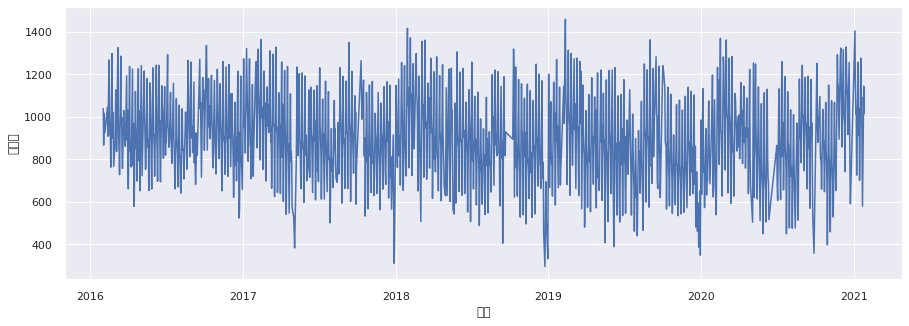

In [237]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.lineplot(y=train['중식계'], x=train['일자'])

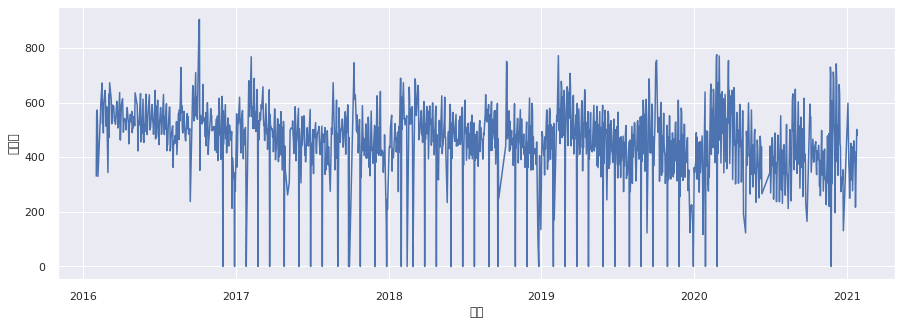

In [238]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.lineplot(y=train['석식계'], x=train['일자'])

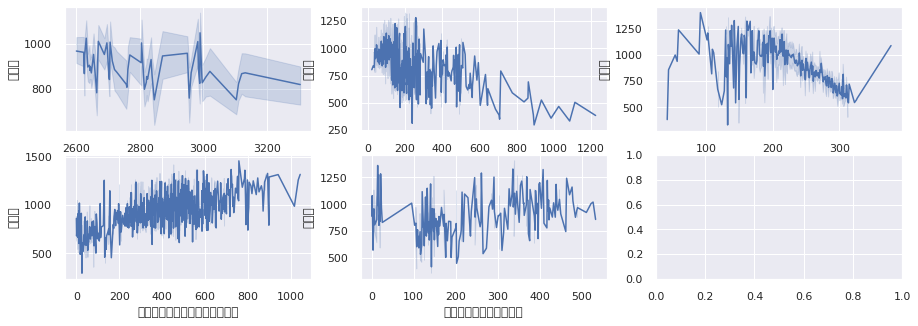

In [239]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False # - 기호 안 깨지게
plt.rcParams['font.size'] = 15

sns.set(rc={'figure.figsize':(15, 5)})

col_list=train.columns[2:7]
f, axs=plt.subplots(2,3)

for a, col in enumerate(col_list):
    i=a//3
    j=a%3
    sns.lineplot(x=train[col], y=train['중식계'], ax=axs[i,j])
    
#             본사정원수	본사휴가자수	본사출장자수

# 본사시간외근무명령서승인건수	현본사소속재택근무자수	

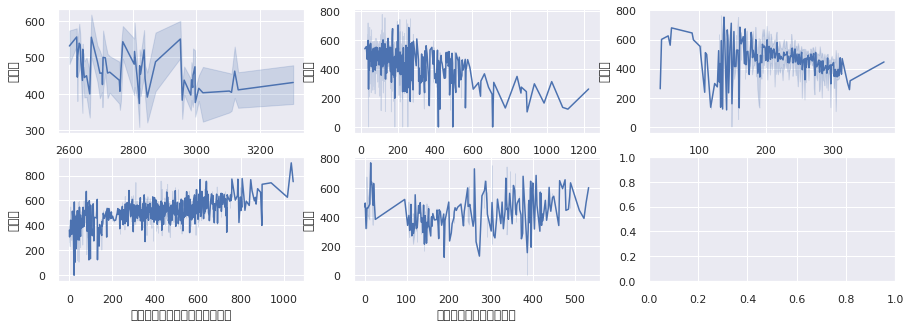

In [240]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False # - 기호 안 깨지게
plt.rcParams['font.size'] = 15

sns.set(rc={'figure.figsize':(15, 5)})

col_list=train.columns[2:7]
f, axs=plt.subplots(2,3)

for a, col in enumerate(col_list):
    i=a//3
    j=a%3
    sns.lineplot(x=train[col], y=train['석식계'], ax=axs[i,j])
    
# 본사정원수	본사휴가자수	본사출장자수

# 본사시간외근무명령서승인건수	현본사소속재택근무자수	

# EDA

In [241]:
train.corr()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
본사정원수,1.000000,0.244666,-0.061688,0.146544,0.452293,-0.115529,-0.173852
본사휴가자수,0.244666,1.000000,-0.273318,-0.230789,0.065397,-0.391975,-0.316894
본사출장자수,-0.061688,-0.273318,1.000000,-0.308757,-0.352643,-0.512680,-0.188164
본사시간외근무명령서승인건수,0.146544,-0.230789,-0.308757,1.000000,0.156792,0.535611,0.571168
현본사소속재택근무자수,0.452293,0.065397,-0.352643,0.156792,1.000000,0.076509,-0.057534
중식계,-0.115529,-0.391975,-0.512680,0.535611,0.076509,1.000000,0.508287
석식계,-0.173852,-0.316894,-0.188164,0.571168,-0.057534,0.508287,1.000000


In [242]:
train_test.describe()

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,연,월,일
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1205.000000,1205.000000,1255.000000,1255.000000,1255.00000
mean,2.004781,2813.752988,156.782470,239.870916,278.341036,53.650996,890.334440,461.772614,2018.169721,6.358566,15.89243
std,1.414205,170.401162,142.369052,43.810279,251.674108,119.132206,209.505057,139.179202,1.518847,3.470845,8.67904
min,0.000000,2601.000000,23.000000,41.000000,0.000000,0.000000,296.000000,0.000000,2016.000000,1.000000,1.00000
25%,1.000000,2648.000000,72.000000,215.000000,3.000000,0.000000,758.000000,406.000000,2017.000000,3.000000,8.00000
50%,2.000000,2763.000000,105.000000,244.000000,301.000000,0.000000,879.000000,483.000000,2018.000000,6.000000,16.00000
75%,3.000000,2973.000000,183.500000,271.000000,460.500000,0.000000,1032.000000,545.000000,2019.000000,9.000000,23.00000
max,4.000000,3305.000000,1224.000000,378.000000,1044.000000,533.000000,1459.000000,905.000000,2021.000000,12.000000,31.00000


* 본사휴가자수는 왜도 심하다
* 야근 0인 날?? 뭐지 분산 크다

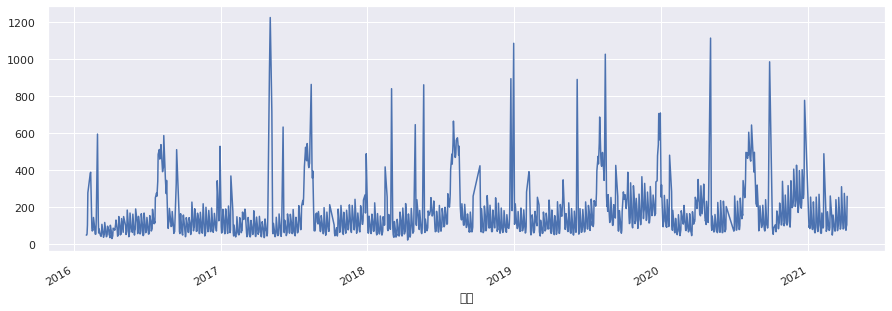

In [243]:
train_test['본사휴가자수'].plot()

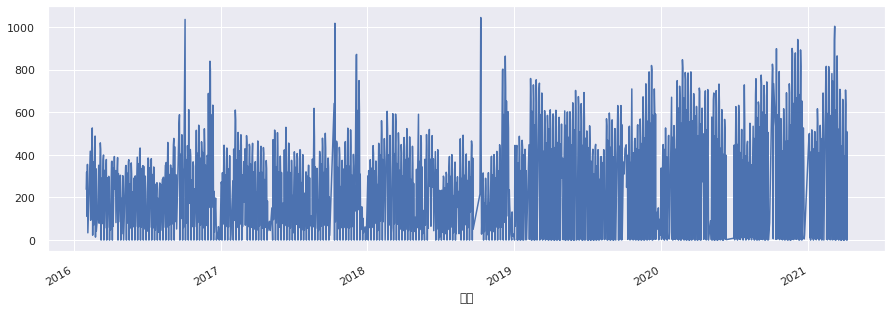

In [244]:
train_test['본사시간외근무명령서승인건수'].plot()

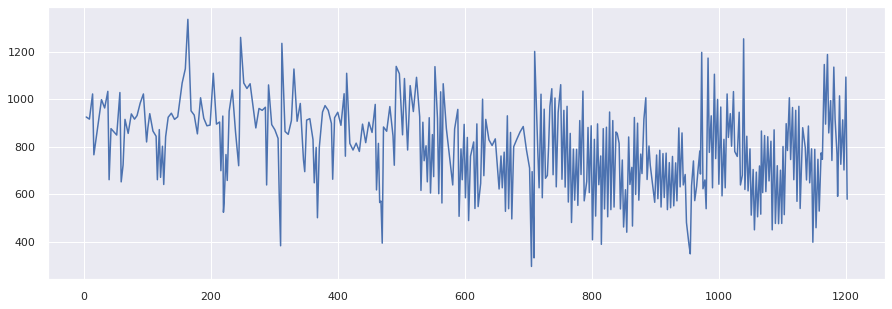

In [245]:
train[train['본사시간외근무명령서승인건수']<50]['중식계'].plot()

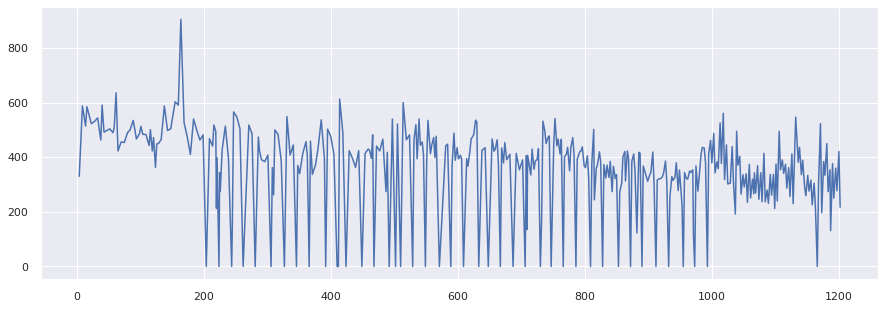

In [246]:
train[train['본사시간외근무명령서승인건수']<50]['석식계'].plot()

In [247]:
train_test.corr()['본사시간외근무명령서승인건수'] # 요일과 강한 상관관계

요일               -0.556351
본사정원수             0.152128
본사휴가자수           -0.235853
본사출장자수           -0.324327
본사시간외근무명령서승인건수    1.000000
현본사소속재택근무자수       0.177127
중식계               0.535611
석식계               0.571168
연                 0.192492
월                -0.000066
일                -0.094676
Name: 본사시간외근무명령서승인건수, dtype: float64

In [248]:
train_test.groupby('요일').mean()['본사시간외근무명령서승인건수'] # 수, 금 야근 안 한다.

요일
0    493.196000
1    466.960000
2      7.940000
3    385.401575
4     37.458167
Name: 본사시간외근무명령서승인건수, dtype: float64

## 메뉴 가공 : 특이메뉴 개수 뽑기

In [249]:
train_test['중식메뉴list'] = train_test['중식메뉴'].str.split()

In [250]:
train_test['석식메뉴list'] = train_test['중식메뉴'].str.split()

In [251]:
train_test['중식메뉴list'] = train_test['중식메뉴list'].apply(lambda menu_list : [menu for menu in menu_list if ('(' not in menu)])
train_test['중식메뉴list'] = train_test['중식메뉴list'].apply(lambda menu_list : [menu for menu in menu_list if ('*' not in menu)])
train_test['중식메뉴list'] = train_test['중식메뉴list'].apply(lambda menu_list : [menu for menu in menu_list if ('/' not in menu)])
train_test['중식메뉴list'] = train_test['중식메뉴list'].apply(lambda menu_list : [menu for menu in menu_list if ('김치' not in menu)])
train_test['중식메뉴list'] = train_test['중식메뉴list'].apply(lambda menu_list : [menu for menu in menu_list if ('요구르트' not in menu)])
train_test['중식메뉴list'] = train_test['중식메뉴list'].apply(lambda menu_list : [menu for menu in menu_list if ('겉절이' not in menu)])
train_test['중식메뉴list'] = train_test['중식메뉴list'].apply(lambda menu_list : [menu for menu in menu_list if ('무침' not in menu)])
train_test['중식메뉴list'] = train_test['중식메뉴list'].apply(lambda menu_list : [menu for menu in menu_list if ('나물' not in menu)])
train_test['중식메뉴list'] = train_test['중식메뉴list'].apply(lambda menu_list : [menu for menu in menu_list if ('국' not in menu)])
train_test['중식메뉴list'] = train_test['중식메뉴list'].apply(lambda menu_list : [menu for menu in menu_list if ('찌개' not in menu)])
train_test['중식메뉴list'] = train_test['중식메뉴list'].apply(lambda menu_list : [menu for menu in menu_list if ('조림' not in menu)])

In [252]:
train_test['중식메뉴list_len'] = train_test['중식메뉴list'].apply(lambda x : len(x))

In [253]:
train_test['석식메뉴list'] = train_test['석식메뉴list'].apply(lambda menu_list : [menu for menu in menu_list if ('(' not in menu)])
train_test['석식메뉴list'] = train_test['석식메뉴list'].apply(lambda menu_list : [menu for menu in menu_list if ('*' not in menu)])
train_test['석식메뉴list'] = train_test['석식메뉴list'].apply(lambda menu_list : [menu for menu in menu_list if ('/' not in menu)])
train_test['석식메뉴list'] = train_test['석식메뉴list'].apply(lambda menu_list : [menu for menu in menu_list if ('김치' not in menu)])
train_test['석식메뉴list'] = train_test['석식메뉴list'].apply(lambda menu_list : [menu for menu in menu_list if ('요구르트' not in menu)])
train_test['석식메뉴list'] = train_test['석식메뉴list'].apply(lambda menu_list : [menu for menu in menu_list if ('겉절이' not in menu)])
train_test['석식메뉴list'] = train_test['석식메뉴list'].apply(lambda menu_list : [menu for menu in menu_list if ('무침' not in menu)])
train_test['석식메뉴list'] = train_test['석식메뉴list'].apply(lambda menu_list : [menu for menu in menu_list if ('나물' not in menu)])
train_test['석식메뉴list'] = train_test['석식메뉴list'].apply(lambda menu_list : [menu for menu in menu_list if ('국' not in menu)])
train_test['석식메뉴list'] = train_test['석식메뉴list'].apply(lambda menu_list : [menu for menu in menu_list if ('찌개' not in menu)])
train_test['석식메뉴list'] = train_test['석식메뉴list'].apply(lambda menu_list : [menu for menu in menu_list if ('조림' not in menu)])

In [254]:
train_test['석식메뉴list_len'] = train_test['석식메뉴list'].apply(lambda x : len(x))

In [255]:
train, test = my_split(train_test)

In [256]:
train[['중식메뉴list_len', '석식메뉴list_len', '중식계', '석식계']].corr() # 별관계없다

,중식메뉴list_len,석식메뉴list_len,중식계,석식계
중식메뉴list_len,1.000000,1.000000,-0.090723,-0.141059
석식메뉴list_len,1.000000,1.000000,-0.090723,-0.141059
중식계,-0.090723,-0.090723,1.000000,0.508287
석식계,-0.141059,-0.141059,0.508287,1.000000


In [257]:
train_test = train_test.drop(['중식메뉴', '석식메뉴', '중식메뉴list', '중식메뉴list_len', '석식메뉴list', '석식메뉴list_len'], axis=1)

# 일단 제출

In [258]:
train_test.columns = ['daysofweek', 'total', 'break', 'outwork', 'latenight', 'home', '중식계', '석식계', 'year', 'month', 'day']

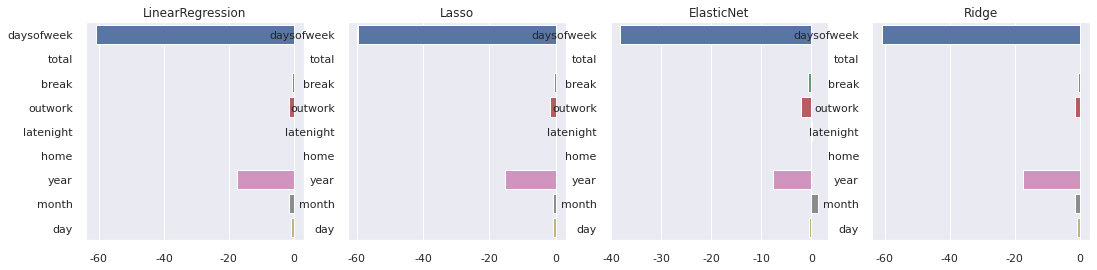

[22:45:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


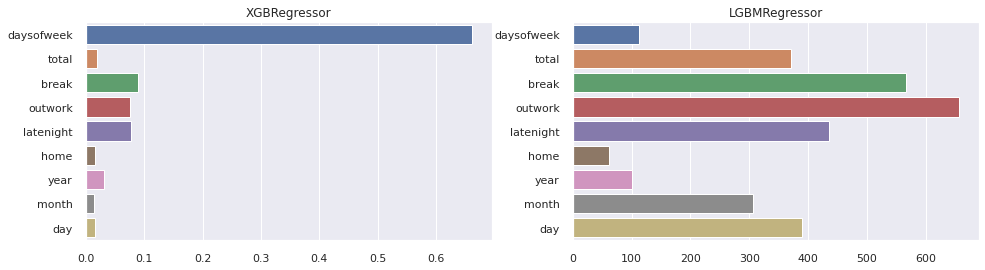

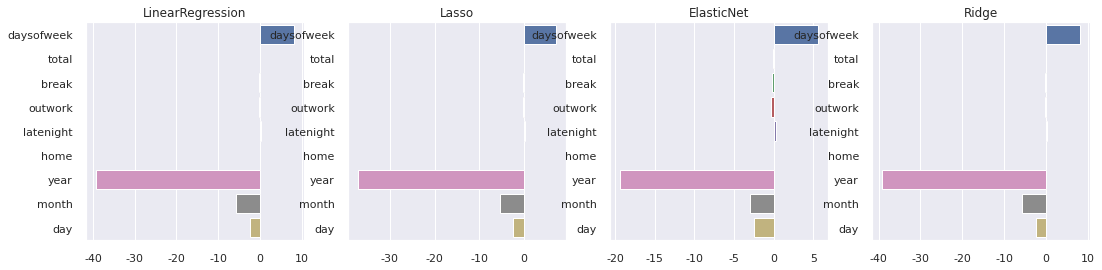

[22:45:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,첫시도_중,첫시도_석
LinearRegression(),84.749223,69.089240
Lasso(),84.929002,69.074314
ElasticNet(),87.195573,69.873074
Ridge(),84.754036,69.088816
XGBRegressor(),63.106409,53.479719
LGBMRegressor(),71.824166,50.840739


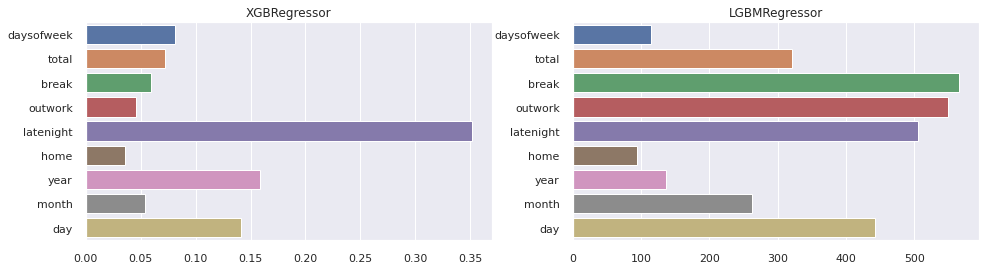

In [259]:
fit_score(data=train_test, target='중식계', model_list=False, trial_name='첫시도_중', DF=True)
fit_score(data=train_test, target='석식계', model_list=False, trial_name='첫시도_석', DF=True)
sco_df

## train_test

# 2차종합가공

## 공휴일
-> 공공데이터포털

In [260]:
import requests
from urllib import parse
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime

def get_holiday(syear=2016, eyear=2021 ) :
    api_key_utf8 = "%2BD%2BbQDvFT8ereI8k58IHSCK0%2BEpeBRyno5%2BNQrTSiZujJLljyd9%2FC%2FhCDQccjOYnAnDBqvb3HI4T3jP4dIemIw%3D%3D"
    api_key_decode = parse.unquote(api_key_utf8)
    operation_name_list =['getRestDeInfo'] #,'getHoliDeInfo getAnniversaryInfo','get24DivisionsInfo','getSundryDayInfo']
    
    item_list = []
    for holiday_type in operation_name_list:
        url = "http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService/" + holiday_type
        for year in np.arange(syear, eyear+1) : 
            params = {
                "ServiceKey": api_key_decode,
                "solYear": year,
                "numOfRows": 100
            }

            response = requests.get(url, params=params)
            xml = BeautifulSoup(response.text, "lxml")
            items = xml.find('items')
            item_dict = {}
            for item in items:
                item_dict = {
                    "날짜": datetime.strptime(item.find("locdate").text.strip(), '%Y%m%d'),
                    "휴일여부": item.find("isholiday").text.strip(),
                    "종류" : item.find("datekind").text.strip(),
                    "이름":  item.find("datename").text.strip()
                }
                item_list.append(item_dict)
            res_df = pd.DataFrame(item_list)
            res_df = res_df.fillna('')
            res_df['휴일여부'].replace('Y', 1, inplace=True)
            res_df['휴일여부'].replace('N', 0, inplace=True)
            res_df['휴일여부'].fillna(0)
            res_df['휴일여부'] = res_df['휴일여부'].astype('int')
            # res_df['휴일여부'] = res_df['일자'].apply(lambda x:  1 if x in list else 0)
    return res_df


In [261]:
train_test = train_test.reset_index(drop=False)

In [262]:
start_date = pd.to_datetime(train_test['일자'].min())  #.year
end_date = pd.to_datetime(train_test['일자'].max())   #.year
print(start_date , end_date)
dates = pd.date_range(start_date,end_date,freq='D') 
date_df = pd.DataFrame({'날짜':dates})
print(date_df.shape)
date_df.head()

2016-02-01 00:00:00 2021-04-09 00:00:00
(1895, 1)


,날짜
0,2016-02-01
1,2016-02-02
2,2016-02-03
3,2016-02-04
4,2016-02-05


In [263]:
start_year = start_date.year  #df['일자'].min()).year
end_year = end_date.year   #df['일자'].max()).year
holiday_df = get_holiday(start_year,end_year)
print(start_year, end_year, holiday_df.shape)
holiday_df.head()

2016 2021 (106, 4)


,날짜,휴일여부,종류,이름
0,2016-01-01,1,01,신정
1,2016-02-07,1,01,설날
2,2016-02-08,1,01,설날
3,2016-02-09,1,01,설날
4,2016-02-10,1,01,대체공휴일


In [264]:
cal_df = pd.merge(date_df, holiday_df[holiday_df['종류']=='01'][['날짜','휴일여부']] , on='날짜', how='left')
cal_df.fillna(0, inplace=True)
cal_df['휴일여부'] = cal_df['휴일여부'].astype('int')
print(cal_df.shape)
cal_df.head()

(1896, 2)


,날짜,휴일여부
0,2016-02-01,0
1,2016-02-02,0
2,2016-02-03,0
3,2016-02-04,0
4,2016-02-05,0


In [265]:
cal_df['전일휴일'] = cal_df['휴일여부'].shift(1)
cal_df['다음날휴일'] = cal_df['휴일여부'].shift(-1)
cal_df = cal_df.fillna(0)
cal_df['전일휴일']   = cal_df['전일휴일'].astype('int')
cal_df['다음날휴일'] = cal_df['다음날휴일'].astype('int')
cal_df.head(10)

,날짜,휴일여부,전일휴일,다음날휴일
0,2016-02-01,0,0,0
1,2016-02-02,0,0,0
2,2016-02-03,0,0,0
3,2016-02-04,0,0,0
4,2016-02-05,0,0,0
5,2016-02-06,0,0,1
6,2016-02-07,1,0,1
7,2016-02-08,1,1,1
8,2016-02-09,1,1,1
9,2016-02-10,1,1,0


In [266]:
csum_holiday = 0
cal_df["연속휴일수"] = 0
for i in np.arange(cal_df.shape[0]-1, 0, -1):
    if cal_df.iloc[i]['휴일여부']==1:
        csum_holiday +=1
    else :
        if cal_df.iloc[i]['다음날휴일']==1 :
            cal_df.at[i,'연속휴일수'] = csum_holiday
            csum_holiday = 0
cal_df.at[cal_df.shape[0]-1,'연속휴일수'] = 2
cal_df.head(12)

,날짜,휴일여부,전일휴일,다음날휴일,연속휴일수
0,2016-02-01,0,0,0,0
1,2016-02-02,0,0,0,0
2,2016-02-03,0,0,0,0
3,2016-02-04,0,0,0,0
4,2016-02-05,0,0,0,0
5,2016-02-06,0,0,1,4
6,2016-02-07,1,0,1,0
7,2016-02-08,1,1,1,0
8,2016-02-09,1,1,1,0
9,2016-02-10,1,1,0,0


In [267]:
print(train_test.shape)
train_test = pd.merge(train_test, cal_df , left_on='일자', right_on='날짜', how='left')
print(train_test.shape)
train_test.head(2)

(1255, 12)
(1255, 17)


,일자,daysofweek,total,break,outwork,latenight,home,중식계,석식계,year,month,day,날짜,휴일여부,전일휴일,다음날휴일,연속휴일수
0,2016-02-01,0,2601,50,150,238,0.0,1039.0,331.0,2016,2,1,2016-02-01,0,0,0,0
1,2016-02-02,1,2601,50,173,319,0.0,867.0,560.0,2016,2,2,2016-02-02,0,0,0,0


In [268]:
print(train_test['휴일여부'].value_counts())
print(train_test['전일휴일'].value_counts())
print(train_test['다음날휴일'].value_counts())

0    1255
Name: 휴일여부, dtype: int64
0    1213
1      42
Name: 전일휴일, dtype: int64
0    1216
1      39
Name: 다음날휴일, dtype: int64


### 공휴일 파생변수 영향도 분석

## 석식계 0인 날 -> drop (모델 성능에 영향 줄까봐)

In [269]:
train_test=train_test[train_test['석식계']!=0]

In [270]:
train.groupby(by='요일')['중식계'].mean().sort_values(ascending=False)

요일
0    1144.331950
1     925.620833
2     905.213389
3     823.991803
4     653.609959
Name: 중식계, dtype: float64

In [271]:
train.groupby(by='요일')['석식계'].mean().sort_values(ascending=False)

요일
0    538.933610
1    520.129167
3    480.401639
4    404.979253
2    363.615063
Name: 석식계, dtype: float64

## 점수 보기

In [272]:
train_test = train_test.drop('날짜', axis=1)

In [273]:
train_test = train_test.set_index('일자')

In [274]:
train_test_중식=train_test.copy()
train_test_석식=train_test.copy()

In [275]:
train_test_중식=train_test_중식.drop('latenight', axis=1)

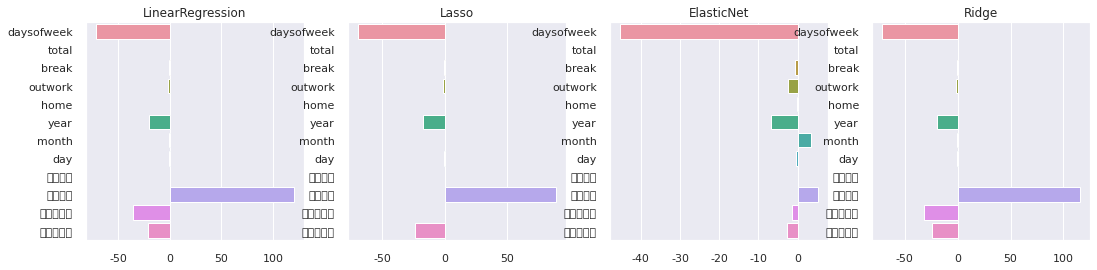

[22:46:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


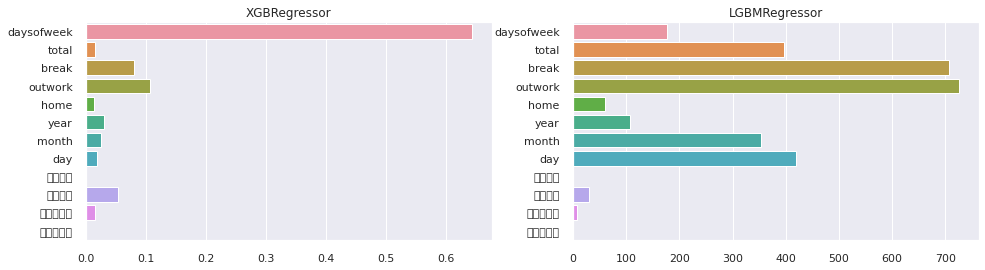

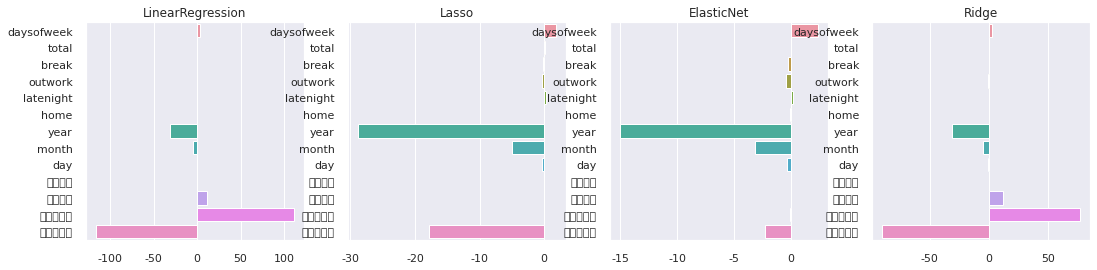

[22:46:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,첫시도_중,첫시도_석,중식_코로나 제외,석식_코로나 제외
LinearRegression(),84.749223,69.089240,85.412967,51.815636
Lasso(),84.929002,69.074314,85.856220,52.889332
ElasticNet(),87.195573,69.873074,90.314519,54.326500
Ridge(),84.754036,69.088816,85.447090,51.575956
XGBRegressor(),63.106409,53.479719,61.845906,42.194748
LGBMRegressor(),71.824166,50.840739,65.681444,43.797337


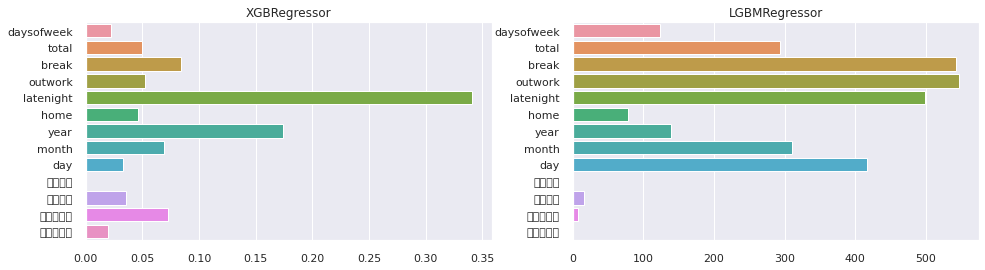

In [276]:
fit_score(data=train_test_중식, target='중식계', model_list=False, trial_name='중식_코로나 제외', DF=True)
fit_score(data=train_test_석식, target='석식계', model_list=False, trial_name='석식_코로나 제외', DF=True)
sco_df

In [277]:
train_test_중식.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1212 entries, 2016-02-01 to 2021-04-09
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   daysofweek  1212 non-null   int64  
 1   total       1212 non-null   int64  
 2   break       1212 non-null   int64  
 3   outwork     1212 non-null   int64  
 4   home        1212 non-null   float64
 5   중식계         1162 non-null   float64
 6   석식계         1162 non-null   float64
 7   year        1212 non-null   int64  
 8   month       1212 non-null   int64  
 9   day         1212 non-null   int64  
 10  휴일여부        1212 non-null   int64  
 11  전일휴일        1212 non-null   int64  
 12  다음날휴일       1212 non-null   int64  
 13  연속휴일수       1212 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 142.0 KB


In [278]:
train_중식, test_중식=my_split(train_test_중식)
model_list=[LinearRegression(),Lasso(),ElasticNet(),Ridge(), XGBRegressor(),LGBMRegressor()]

#----------------------------------------------- 하단 코드 동일
y = train_중식['중식계']
X = train_중식.drop(['중식계','석식계'], axis=1)

# X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)
# model= LGBMRegressor()
# for model in model_list:
#     model.fit(X_train, y_train)
#     pred = model.predict(X_val)
#     mae = mean_absolute_error(y_val, pred)
#     print(f" MAE:{mae:.4f} {model.__class__.__name__}") 


#------------------------------------------------- 공모전 제출용 학습
model= LGBMRegressor()
model.fit(X, y)
test_pred = model.predict(test_중식)        #---------->  submit 제출 답안
test_pred = np.round(test_pred, 0).astype(int)

#------------------------------------------------- 제출 전 확인
print(len(test_pred), test_pred)
print(sub['중식계'].min(), sub['중식계'].max())
print(test_중식.index.values.min()   , test_중식.index.values.max())
sub.head(1)
#------------------------------------------------- 답안지 작성
sub['중식계'] = test_pred.reshape(-1,1)
print(sub.head(2))
# sub.to_csv(".csv", index=False)   

50 [1023  861  503 1229 1000  981  878  580 1305 1086  840 1255 1038 1091
  847  663 1179 1029  843  785  524 1194 1017  904  609 1275 1015 1056
  914  723 1235 1035 1066  928  653 1200  969  872  842  511 1173  965
  878  740  569 1259 1038  963  881  631]
0 0
2021-01-27T00:00:00.000000000 2021-04-09T00:00:00.000000000
           일자   중식계  석식계
0  2021-01-27  1023    0
1  2021-01-28   861    0


In [279]:
train_석식, test_석식=my_split(train_test_석식)
model_list=[LinearRegression(),Lasso(),ElasticNet(),Ridge(), XGBRegressor(),LGBMRegressor()]

#----------------------------------------------- 하단 코드 동일
y = train_석식['석식계']
X = train_석식.drop(['중식계','석식계'], axis=1)

# X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)
# model= LGBMRegressor()
# for model in model_list:
#     model.fit(X_train, y_train)
#     pred = model.predict(X_val)
#     mae = mean_absolute_error(y_val, pred)
#     print(f" MAE:{mae:.4f} {model.__class__.__name__}") 


#------------------------------------------------- 공모전 제출용 학습
model= LGBMRegressor()
model.fit(X, y)
test_pred = model.predict(test_석식)        #---------->  submit 제출 답안
test_pred = np.round(test_pred, 0).astype(int)

#------------------------------------------------- 제출 전 확인
print(len(test_pred), test_pred)
print(sub['석식계'].min(), sub['석식계'].max())
print(test_석식.index.values.min()   , test_석식.index.values.max())
sub.head(1)
#------------------------------------------------- 답안지 작성
sub['석식계'] = test_pred.reshape(-1,1)
print(sub.head(2))
# sub.to_csv(".csv", index=False)   
sub.to_csv("/content/gdrive/MyDrive/cafeteria/study2.csv", index=False)   

50 [377 403 245 547 380 442 414 337 595 497 207 713 630 430 509 345 685 612
 368 496 263 680 462 523 353 616 594 448 511 280 677 505 453 459 273 610
 545 394 406 267 613 550 426 384 272 586 504 435 460 275]
0 0
2021-01-27T00:00:00.000000000 2021-04-09T00:00:00.000000000
           일자   중식계  석식계
0  2021-01-27  1023  377
1  2021-01-28   861  403


# 모델 탐색(pycaret)

In [280]:
# from pycaret.utils import check_metric
# from pycaret.datasets import get_data 
# from pycaret.classification import *
# from pycaret.regression import *

## 중식계
setup(data=X) , 이때 X는 KFold 처럼 X_train + y_train 데이터를 넣는다 ************** 주의

In [317]:
X_lunch = train_중식.drop('석식계', axis=1) # 귀찮아서 그냥 이름 바꿈
y_lunch = train_중식['중식계']
train_lunch = train_중식.drop(['중식계', '석식계'], axis=1)
test_lunch = test_중식.copy()

In [282]:
print(X_lunch.shape)
X_lunch.head(1)

(1162, 13)


,daysofweek,total,break,outwork,home,중식계,year,month,day,휴일여부,전일휴일,다음날휴일,연속휴일수
일자,,,,,,,,,,,,,
2016-02-01,0,2601,50,150,0.0,1039.0,2016,2,1,0,0,0,0


In [283]:
X_lunch.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1162 entries, 2016-02-01 to 2021-01-26
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   daysofweek  1162 non-null   int64  
 1   total       1162 non-null   int64  
 2   break       1162 non-null   int64  
 3   outwork     1162 non-null   int64  
 4   home        1162 non-null   float64
 5   중식계         1162 non-null   float64
 6   year        1162 non-null   int64  
 7   month       1162 non-null   int64  
 8   day         1162 non-null   int64  
 9   휴일여부        1162 non-null   int64  
 10  전일휴일        1162 non-null   int64  
 11  다음날휴일       1162 non-null   int64  
 12  연속휴일수       1162 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 127.1 KB


### 전처리 : setup()

In [284]:
reg_lunch = setup(data=X_lunch,                            #--------------------X_train 0.8
                    target='중식계',
                    train_size=0.8,      #default = 0.7
                    imputation_type='simple',    
                    #ignore_features=[],
                    data_split_shuffle=False,     
                    session_id=1414,     #random_state
                    fold_strategy='kfold',
                    fold=10,   
                    fold_shuffle=False,
                    verbose=True, 
                    silent= True
                 )

,Description,Value
0,session_id,1414
1,Target,중식계
2,Original Data,"(1162, 13)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(929, 33)"


In [285]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


### 모델 생성 : create_model()

In [286]:
rf_model = create_model('rf', fold=5)

MAE         MSE      RMSE      R2   RMSLE    MAPE
Split  Fold                                                       
CV-Val 0     71.6995   8943.6246   94.5707  0.6875  0.1033  0.0782
       1     64.4835   7982.1096   89.3427  0.8015  0.1159  0.0798
       2     72.0660   8968.7856   94.7037  0.8052  0.1234  0.0886
       3     71.7311   9633.1542   98.1486  0.8012  0.1366  0.0947
       4     79.5155  11183.5940  105.7525  0.7483  0.1405  0.1075
       Mean  71.8991   9342.2536   96.5036  0.7687  0.1239  0.0898
       Std    4.7559   1060.5218    5.4130  0.0458  0.0136  0.0107
Train  NaN   24.7591   1169.7001   34.2009  0.9729  0.0459  0.0305

### 모델비교 : compare_models()

In [287]:
#return Trained model depending on 'n_select'
top3_model = compare_models(sort='MAE',           #default 'R2'
                             n_select= 3,          #top-n
                             #--------
                             round=4,              #np.round(score)
                             cross_validation=True,
                             verbose=True,
                             errors='ignore'
                             #fold=None,           #n_splits’ parameter of the CV generator in the setup function.
                             #fit_kwargs: dict, default = {} (empty dict)
                            )

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,6.784580e+01,8.252312e+03,9.050870e+01,7.906000e-01,0.1121,0.0829,0.131
br,Bayesian Ridge,6.844130e+01,8.105894e+03,8.935810e+01,7.950000e-01,0.1105,0.0832,0.019
ridge,Ridge Regression,6.844460e+01,8.108199e+03,8.936050e+01,7.947000e-01,0.1105,0.0832,0.016
lr,Linear Regression,6.853930e+01,8.132832e+03,8.947890e+01,7.936000e-01,0.1106,0.0833,0.015
lasso,Lasso Regression,6.861460e+01,8.183453e+03,8.986170e+01,7.955000e-01,0.1117,0.0837,0.017
lightgbm,Light Gradient Boosting Machine,7.159850e+01,9.025337e+03,9.467610e+01,7.740000e-01,0.1190,0.0877,0.100
rf,Random Forest Regressor,7.320600e+01,9.705552e+03,9.814690e+01,7.566000e-01,0.1256,0.0912,0.705
et,Extra Trees Regressor,7.630600e+01,1.112845e+04,1.046359e+02,7.231000e-01,0.1331,0.0946,0.603
ada,AdaBoost Regressor,8.018190e+01,1.091558e+04,1.035933e+02,7.321000e-01,0.1292,0.0995,0.132
omp,Orthogonal Matching Pursuit,8.034530e+01,1.137627e+04,1.059730e+02,7.201000e-01,0.1352,0.0999,0.016


### 모델튜닝 : tune_model()
모델 하이퍼파라미터 튜닝 : 상단시간 소요 주의~~~~

In [288]:
#---- 튜닝전
print(top3_model)

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1414, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False), Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
    

In [289]:
tuned_top3_model  = [tune_model(i) for i in top3_model]                      # ........ Optuna like..Hyper-parameter tunning

MAE         MSE      RMSE      R2   RMSLE    MAPE
Split  Fold                                                       
CV-Val 0     67.4082   9038.4414   95.0707  0.7012  0.0978  0.0758
       1     69.6720   7816.4785   88.4109  0.7102  0.0966  0.0745
       2     63.0596   6484.6021   80.5270  0.8333  0.0896  0.0679
       3     55.7804   4855.2021   69.6793  0.8696  0.0908  0.0709
       4     61.4631   6887.1396   82.9888  0.8272  0.1175  0.0806
       5     89.2398  11671.7744  108.0360  0.7685  0.1158  0.0940
       6     66.1710   7424.8096   86.1673  0.8203  0.1165  0.0874
       7     69.2225   8611.0254   92.7956  0.8449  0.1354  0.0964
       8     66.7198   7620.6089   87.2961  0.8269  0.1207  0.0902
       9     77.2924  10889.7051  104.3538  0.7571  0.1278  0.0973
       Mean  68.6029   8129.9787   89.5325  0.7959  0.1109  0.0835
       Std    8.7174   1924.7908   10.6725  0.0551  0.0152  0.0104
Train  NaN   63.0542   6982.0234   83.5585  0.8383  0.1043  0.0769

In [290]:
#--튜닝 후 
print(tuned_top3_model)

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=3,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.5, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1414, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), BayesianRidge(alpha_1=0.005, alpha_2=0.0001, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=0.005, lambda_2=0.1, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False), Ridge(alpha=7.88, copy_X=True, fit_intercept=True, max_iter=None,
    

### 학습&예측 : blend_models(), predict_model(), finalize_model()

In [291]:
# 중식계 앙상블 모델
ens_model   = blend_models(estimator_list= tuned_top3_model, #-----------top3_model 
                           fold=5, 
                           optimize='MAE',
                           round= 4,
                           verbose=True)
pred_holdout = predict_model(ens_model)                    #--------------------predict(X_val)  0.2 
final_model  = finalize_model(ens_model)
pred      = predict_model(final_model, data=test_lunch)    #--------------------predict(test)  공모전문제
print(pred['Label'].head())  


MAE        MSE     RMSE      R2   RMSLE    MAPE
Split  Fold                                                     
CV-Val 0     64.8929  7772.1118  88.1596  0.7284  0.0925  0.0716
       1     54.6300  4976.0197  70.5409  0.8762  0.0861  0.0642
       2     69.8881  8299.4215  91.1012  0.8197  0.1145  0.0831
       3     66.7896  7743.2847  87.9959  0.8402  0.1222  0.0900
       4     67.3959  8281.8565  91.0047  0.8136  0.1161  0.0868
       Mean  64.7193  7414.5388  85.7605  0.8156  0.1063  0.0792
       Std    5.2913  1242.3820   7.7255  0.0488  0.0142  0.0097
Train  NaN   52.3700  4723.1953  68.7255  0.8906  0.0858  0.0636

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,201.6699,65422.9203,255.779,-0.3221,0.351,0.221


일자
2021-01-27     983.748379
2021-01-28     881.933262
2021-01-29     610.556730
2021-02-01    1281.787807
2021-02-02    1039.024621
Name: Label, dtype: float64


In [292]:
sub["중식계"] = pred["Label"].values
sub.head()

,일자,중식계,석식계
0,2021-01-27,983.748379,377
1,2021-01-28,881.933262,403
2,2021-01-29,610.556730,245
3,2021-02-01,1281.787807,547
4,2021-02-02,1039.024621,380


In [293]:
print(rf_model)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=1414, verbose=0, warm_start=False)


In [294]:
print(final_model)

VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.15,
                                                       loss='ls', max_depth=3,
                                                       max_features=1.0,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.5,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                   

### 평가점수 : check_metric()

In [295]:
# ------------- Accuracy, AUC, Recall, Precision, F1, Kappa, MCC, MAE, MSE, RMSE, R2, RMSLE, MAPE.
check_metric(pred_holdout['중식계'], pred_holdout['Label'], metric='MAE') 

201.6699

### 평가결과 시각화 (optional)
* ref : https://www.kaggle.com/resilientmax/simple-preprocessing-and-pycaret-demonstration

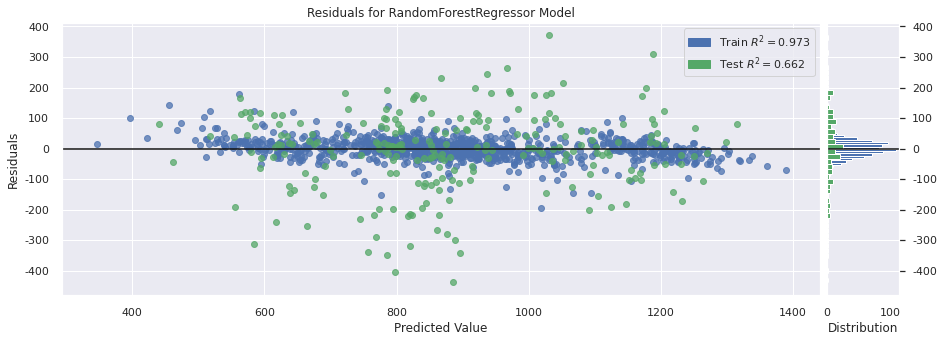

In [296]:
#---- 결정계수(R sqaured, Coefficient of Determination, R2):설명력 == 모형 적합도 평가
plot_model(rf_model)

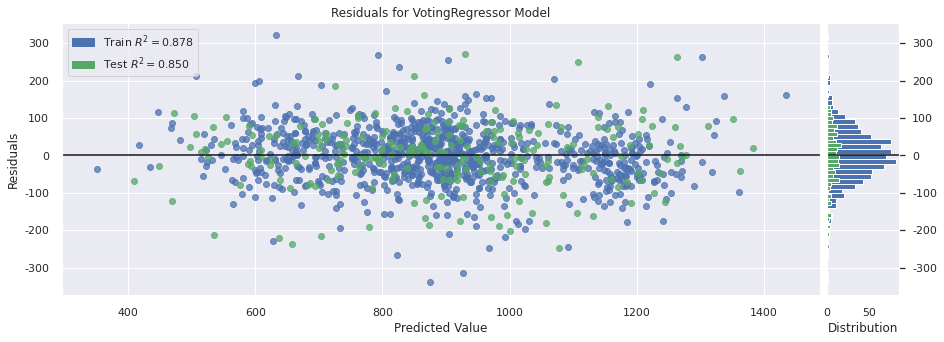

In [297]:
plot_model(final_model)

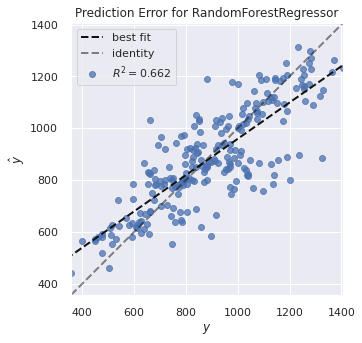

In [298]:
plot_model(rf_model,    plot = 'error')

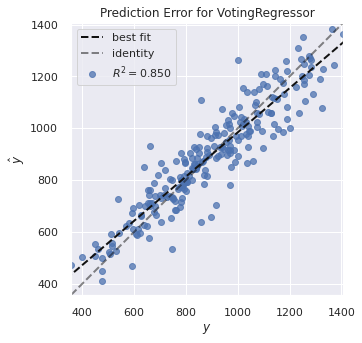

In [299]:
plot_model(final_model, plot = 'error')

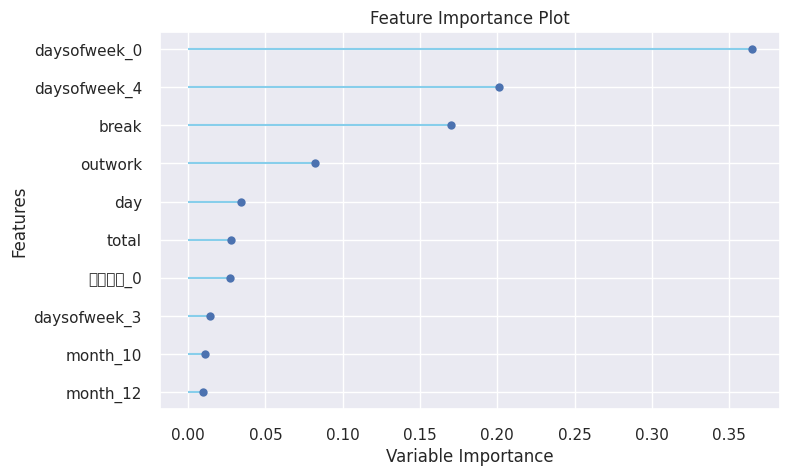

In [300]:
plot_model(rf_model,    plot='feature')

In [301]:
evaluate_model(rf_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### 모델 저장 (optional)

In [302]:
save_model(final_model,'pycaret_final_model_ver01')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='중식계',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='m...
                                                             alpha_init=None,
                                                             compute_score=False,
                                                             copy_X=True,
                                                             fit_intercept=True

### 저장모델 불러오기 (optional)

In [303]:
saved_final_pycaret_model = load_model('pycaret_final_model_ver01')

#--- 예측
new_pred = predict_model(saved_final_pycaret_model, data=X_lunch.iloc[-100:])
print("MAE 점수 : ", check_metric(new_pred.중식계, new_pred.Label, 'MAE'))
print()
print(new_pred["Label"].head())

Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,70.5985,8487.1135,92.1255,0.8314,0.1088,0.0788


MAE 점수 :  70.5985

일자
2020-08-24    1131.074650
2020-08-25     987.515609
2020-08-26     962.442498
2020-08-27     917.637591
2020-08-28     730.720474
Name: Label, dtype: float64


## 석식계

In [318]:
X_dinner = train_석식.drop('중식계', axis=1) # 귀찮아서 그냥 이름 바꿈
y_dinner = train_석식['석식계']
train_dinner = train_석식.drop(['중식계', '석식계'], axis=1)
test_dinner = test_석식.copy()

In [305]:
print(X_dinner.shape)
X_dinner.head(1)

(1162, 14)


,daysofweek,total,break,outwork,latenight,home,석식계,year,month,day,휴일여부,전일휴일,다음날휴일,연속휴일수
일자,,,,,,,,,,,,,,
2016-02-01,0,2601,50,150,238,0.0,331.0,2016,2,1,0,0,0,0


In [306]:
reg_dinner = setup(data=X_dinner,                           #--------------------X_train 0.8
            target='석식계',
            train_size=0.8,                                 #default = 0.7
            imputation_type='simple',    
            #ignore_features=[],
            data_split_shuffle=False,     
            session_id=1414,     #random_state
            fold_strategy='kfold',
            fold=10,   
            fold_shuffle=False,
            verbose=True, 
            silent= True
           )

,Description,Value
0,session_id,1414
1,Target,석식계
2,Original Data,"(1162, 14)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(929, 33)"


In [307]:
#return Trained model depending on 'n_select'
top3_model = compare_models(sort='MAE',           #default 'R2'
                             n_select= 3,          #top-n
                             #--------
                             round=4,              #np.round(score)
                             cross_validation=True,
                             verbose=True,
                             errors='ignore'
                             #fold=None,           #n_splits’ parameter of the CV generator in the setup function.
                             #fit_kwargs: dict, default = {} (empty dict)
                            )

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,45.4495,3631.4959,59.7930,0.5298,0.1380,0.1040,0.015
lr,Linear Regression,45.4993,3631.2870,59.7934,0.5264,0.1386,0.1039,0.016
lasso,Lasso Regression,47.5382,4030.2462,62.8773,0.4933,0.1462,0.1100,0.017
gbr,Gradient Boosting Regressor,47.8716,4135.8495,63.7089,0.4864,0.1472,0.1106,0.138
et,Extra Trees Regressor,48.6047,4306.8140,64.7380,0.4812,0.1504,0.1130,0.602
lightgbm,Light Gradient Boosting Machine,48.7783,4108.0677,63.2610,0.4916,0.1468,0.1121,0.102
rf,Random Forest Regressor,52.6149,4868.8532,69.0003,0.4040,0.1609,0.1227,0.709
en,Elastic Net,54.0741,5114.1943,70.3754,0.3723,0.1675,0.1282,0.019
huber,Huber Regressor,54.1505,5062.3123,69.2806,0.4009,0.1622,0.1268,0.059
br,Bayesian Ridge,56.1789,5498.5781,72.9422,0.3232,0.1739,0.1337,0.018


In [308]:
# 석식계 앙상블 모델
tuned_top3_model  = [tune_model(i) for i in top3_model]    
ens_model   = blend_models(estimator_list= tuned_top3_model,   #-----------top3_model 
                           fold=5, 
                           optimize='MAE',
                           round= 4,
                           verbose=True)
pred_holdout = predict_model(ens_model)                        #--------------------predict(X_val)  0.2 
final_model  = finalize_model(ens_model)
pred = predict_model(final_model, test_dinner)                 #--------------------predict(test)  공모전문제
print(pred['Label'].head()) 

MAE        MSE     RMSE      R2   RMSLE    MAPE
Split  Fold                                                     
CV-Val 0     50.8588  4945.1250  70.3216  0.2262  0.1315  0.0950
       1     44.5318  3202.8696  56.5939  0.5813  0.1392  0.1054
       2     41.1884  3015.2544  54.9113  0.6565  0.1258  0.0918
       3     47.4853  3818.9207  61.7974  0.6151  0.1554  0.1128
       4     48.8116  4135.7637  64.3099  0.6523  0.1841  0.1385
       Mean  46.5752  3823.5867  61.5868  0.5463  0.1472  0.1087
       Std    3.3874   691.9560   5.5362  0.1624  0.0210  0.0167
Train  NaN   42.6071  3308.6604  57.5210  0.6590  0.1377  0.0986

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,296.561798,116413.109375,341.193604,-5.3528,0.6039,0.7751


일자
2021-01-27    379.134125
2021-01-28    434.166412
2021-01-29    303.794342
2021-02-01    548.592957
2021-02-02    512.938171
Name: Label, dtype: float32


In [309]:
sub["석식계"] = pred["Label"].values
sub.head()

,일자,중식계,석식계
0,2021-01-27,983.748379,379.134125
1,2021-01-28,881.933262,434.166412
2,2021-01-29,610.556730,303.794342
3,2021-02-01,1281.787807,548.592957
4,2021-02-02,1039.024621,512.938171


In [310]:
sub.to_csv("/content/gdrive/MyDrive/cafeteria/study3.csv", index=False)   

# OPTUNA

## 중식계 - XGBReg

In [319]:
# import optuna
def objectiveXGB(trial, X, y):
    # To select which parameters to optimize, please look at the XGBoost documentation:
    # https://xgboost.readthedocs.io/en/latest/parameter.html
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=1234)

    param = {
        "verbosity": 1,
        #'tree_method':'gpu_hist',  # colab or GPU 있는 경우만
        # 'lambda': trial.suggest_loguniform(
        #     'lambda', 1e-3, 10.0
        # ),
        'objective': 'reg:squarederror',  #'reg:linear', # 회귀
        #'metric': 'mae', 
        'max_depth': trial.suggest_int('max_depth',3, 30),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
        # 'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.7, 1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300 ),
        'alpha': trial.suggest_loguniform( 'alpha', 1e-3, 10.0),
        'random_state': 42
    }
    model = XGBRegressor(**param)  
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=25,verbose=False)
    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    return mae

In [320]:
studyXGB_lunch = optuna.create_study(direction='minimize')
#--- 중식계 ---
# study.optimize(objective, n_trials=100) 
studyXGB_lunch.optimize(lambda trial: objectiveXGB(trial, train_lunch, y_lunch), n_trials=100) 
print('study.best_params:'        , studyXGB_lunch.best_trial.value)
print('Number of finished trials:', len(studyXGB_lunch.trials))
print('Best trial:'               , studyXGB_lunch.best_trial.params)
print('study.best_params:'        , studyXGB_lunch.best_params)

[I 2022-03-22 22:57:39,486] A new study created in memory with name: no-name-661e17ce-0511-4d26-8bca-ea63e859b30e
[I 2022-03-22 22:57:40,621] Trial 0 finished with value: 891.0365813645682 and parameters: {'max_depth': 30, 'learning_rate': 2.0606326430851882e-08, 'n_estimators': 466, 'subsample': 0.7926706552950631, 'min_child_weight': 138, 'alpha': 0.5330127456948571}. Best is trial 0 with value: 891.0365813645682.
[I 2022-03-22 22:57:45,132] Trial 1 finished with value: 88.49153916518576 and parameters: {'max_depth': 23, 'learning_rate': 0.0025410624171171513, 'n_estimators': 1486, 'subsample': 0.8705395313717945, 'min_child_weight': 31, 'alpha': 0.0037409520348807724}. Best is trial 1 with value: 88.49153916518576.
[I 2022-03-22 22:57:45,622] Trial 2 finished with value: 890.5698837880924 and parameters: {'max_depth': 25, 'learning_rate': 2.1786565459786646e-06, 'n_estimators': 244, 'subsample': 0.9035733992294291, 'min_child_weight': 288, 'alpha': 0.1074426957955372}. Best is trial

study.best_params: 86.99406452751978
Number of finished trials: 100
Best trial: {'max_depth': 30, 'learning_rate': 0.004737740731544972, 'n_estimators': 1376, 'subsample': 0.8650769679284835, 'min_child_weight': 11, 'alpha': 0.2196569295883015}
study.best_params: {'max_depth': 30, 'learning_rate': 0.004737740731544972, 'n_estimators': 1376, 'subsample': 0.8650769679284835, 'min_child_weight': 11, 'alpha': 0.2196569295883015}


In [347]:
optuna.visualization.plot_param_importances(studyXGB_lunch)

In [329]:
pred['Label']

일자
2021-01-27    379.134125
2021-01-28    434.166412
2021-01-29    303.794342
2021-02-01    548.592957
2021-02-02    512.938171
2021-02-03    421.145844
2021-02-04    510.464630
2021-02-05    371.873444
2021-02-08    587.086182
2021-02-09    532.342834
2021-02-10    248.621811
2021-02-15    620.994812
2021-02-16    620.934143
2021-02-17    423.891266
2021-02-18    516.119934
2021-02-19    361.032379
2021-02-22    611.921936
2021-02-23    606.121887
2021-02-24    399.477570
2021-02-25    515.408813
2021-02-26    338.511292
2021-03-02    619.793518
2021-03-03    424.949951
2021-03-04    573.685364
2021-03-05    374.435059
2021-03-08    665.337219
2021-03-09    685.306946
2021-03-10    428.056396
2021-03-11    536.928772
2021-03-12    362.086945
2021-03-15    647.438416
2021-03-16    573.793823
2021-03-17    414.643677
2021-03-18    497.793488
2021-03-19    349.640869
2021-03-22    586.617737
2021-03-23    566.435303
2021-03-24    392.210541
2021-03-25    457.157257
2021-03-26    330.5292

## 석식계 - XGBReg

In [322]:
studyXGB_dinner = optuna.create_study(direction='minimize')
#--- 석식계 ---
# study.optimize(objective, n_trials=100) 
studyXGB_dinner.optimize(lambda trial: objectiveXGB(trial, train_dinner, y_dinner), n_trials=100) 
print('study.best_params:'        , studyXGB_dinner.best_trial.value)
print('Number of finished trials:', len(studyXGB_dinner.trials))
print('Best trial:'               , studyXGB_dinner.best_trial.params)
print('study.best_params:'        , studyXGB_dinner.best_params)

[I 2022-03-22 23:01:36,984] A new study created in memory with name: no-name-40cbe77e-39b5-4482-a536-ab6717aee8ea
[I 2022-03-22 23:01:38,158] Trial 0 finished with value: 367.0919321412181 and parameters: {'max_depth': 6, 'learning_rate': 0.00016696453915269652, 'n_estimators': 882, 'subsample': 0.9912766898930208, 'min_child_weight': 230, 'alpha': 1.8096045078780942}. Best is trial 0 with value: 367.0919321412181.
[I 2022-03-22 23:01:40,973] Trial 1 finished with value: 426.02055971612236 and parameters: {'max_depth': 5, 'learning_rate': 9.74468349844212e-06, 'n_estimators': 2053, 'subsample': 0.9482008444474809, 'min_child_weight': 105, 'alpha': 0.0019920621068477817}. Best is trial 0 with value: 367.0919321412181.
[I 2022-03-22 23:01:41,985] Trial 2 finished with value: 435.4458398992923 and parameters: {'max_depth': 27, 'learning_rate': 6.868413581102798e-07, 'n_estimators': 834, 'subsample': 0.8998240972395417, 'min_child_weight': 245, 'alpha': 1.707735538197677}. Best is trial 0 

study.best_params: 69.9113878241936
Number of finished trials: 100
Best trial: {'max_depth': 8, 'learning_rate': 0.002056672858265947, 'n_estimators': 1032, 'subsample': 0.732936590311304, 'min_child_weight': 33, 'alpha': 0.007775906375407947}
study.best_params: {'max_depth': 8, 'learning_rate': 0.002056672858265947, 'n_estimators': 1032, 'subsample': 0.732936590311304, 'min_child_weight': 33, 'alpha': 0.007775906375407947}


In [323]:
optuna.visualization.plot_param_importances(studyXGB_dinner)

## 코로나 예측값

In [396]:
covid=pd.read_csv('/content/gdrive/MyDrive/cafeteria/dataset/owid-covid-data.csv', encoding='cp949')
covid_kor=covid.loc[covid.location=='South Korea'][['date','new_cases']]
covid_kor=covid_kor.rename(columns={'date' : '일자','new_cases' : 'corona'})
covid_kor['일자']= pd.to_datetime(covid_kor['일자'],format='%Y-%m-%d')
covid_kor = covid_kor.set_index('일자')

In [397]:
covid_train=covid_kor[covid_kor.index < '2021-01-27']
covid_test=covid_kor[(covid_kor.index >= '2021-01-27') & (covid_kor.index <= '2021-04-09')]
covid_pred=covid_test.drop('corona', axis=1)

covid_train=covid_train.fillna(0)

In [398]:
covid_train.info() # 주말 껴서 더 길다

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 371 entries, 2020-01-22 to 2021-01-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   corona  371 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


In [399]:
covid_test.info() # 주말 껴서 더 길다

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73 entries, 2021-01-27 to 2021-04-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   corona  73 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


In [402]:
corona_prediction=[]
for date in covid_test.index :
  covid_train=covid_kor.loc[ : date, 'corona']
  covid_train=covid_train.fillna(0)
  #auto = auto_arima(covid_train['corona']).order
  model = ARIMA(covid_train.values, order=(1,0,2)) #4191
  fit_model = model.fit(trend='c', full_output=True, disp=True)
  forcast = fit_model.forecast(steps=1)
  corona_prediction.append(forcast[0].tolist()[0])

In [414]:
covid_test['corona'] = corona_prediction
covid = pd.concat([covid_train, covid_test], axis=0)

covid = covid.reset_index(drop=False)
train_test_co = train_test.reset_index(drop=False)

train_test_co = pd.merge(train_test_co, covid, how='left', on='일자')
train_test_co['corona'] = train_test_co['corona'].fillna(0)

In [422]:
train_test_co = train_test_co.drop_duplicates(['일자'], keep='last')

In [425]:
train_test = train_test_co.copy()

# day 변수 월급날 기준으로 변경 -> 21일 = 0(공휴일 겹치면 직전 영업일)

In [429]:
train_test['day']

일자
2016-02-01    1
2016-02-02    2
2016-02-03    3
2016-02-04    4
2016-02-05    5
             ..
2021-04-05    5
2021-04-06    6
2021-04-07    7
2021-04-08    8
2021-04-09    9
Name: day, Length: 1212, dtype: int64

In [ ]:
train['day']

In [434]:

train, test = my_split(train_test)

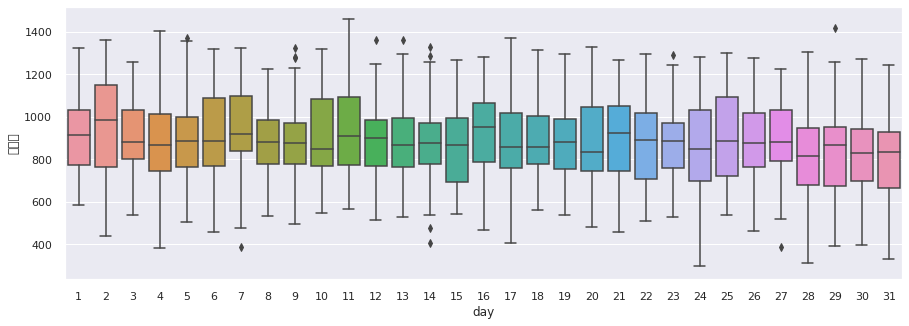

In [435]:
sns.boxplot(train['day'], train['중식계'])

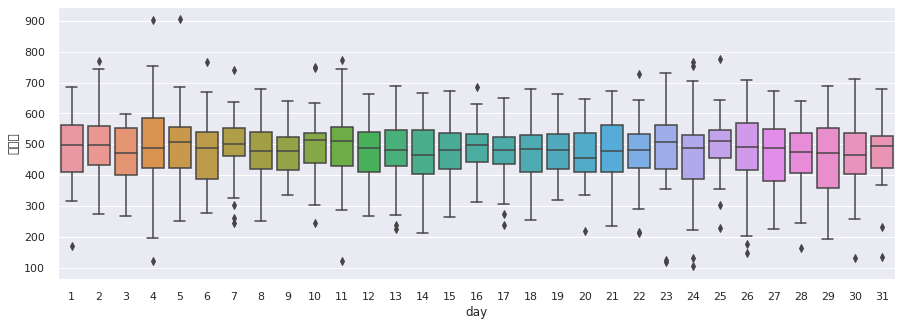

In [436]:
sns.boxplot(train['day'], train['석식계'])

# 피쳐 정리

In [427]:
train_test = train_test.set_index('일자')

In [428]:
train_test.columns

Index(['daysofweek',      'total',      'break',    'outwork',  'latenight',
             'home',        '중식계',        '석식계',       'year',      'month',
              'day',       '휴일여부',       '전일휴일',      '다음날휴일',      '연속휴일수',
                  0,     'corona'],
      dtype='object')

In [431]:
lunch_feature = ['daysofweek', 'total', 'break', 'outwork', 'home', '중식계', '석식계',
                 'year', 'month', 'day', '전일휴일', '다음날휴일', 'corona']
dinner_feature = ['daysofweek', 'total', 'break', 'outwork', 'latenight', 'home', '중식계', '석식계',
                  'year', 'month', 'day', '전일휴일', '다음날휴일', 'corona']

In [432]:
train_test_중식=train_test[lunch_feature]
train_test_석식=train_test[dinner_feature]

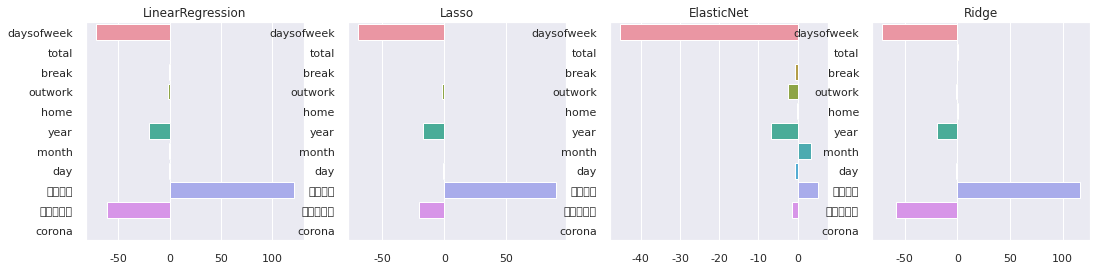

[05:49:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
LinearRegression()    85.020851
Lasso()               86.062168
ElasticNet()          90.451746
Ridge()               85.052846
XGBRegressor()        61.845906
LGBMRegressor()       65.681444
Name: 중식_정리, dtype: float64


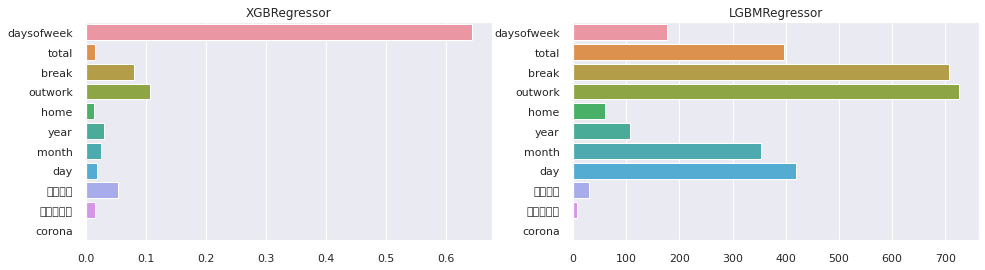

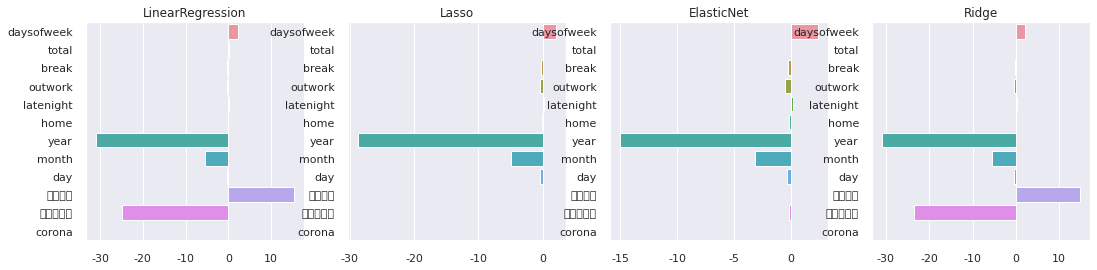

[05:49:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
LinearRegression()    52.742839
Lasso()               53.671714
ElasticNet()          54.418930
Ridge()               52.780217
XGBRegressor()        42.770065
LGBMRegressor()       43.797337
Name: 석식_정리, dtype: float64


,첫시도_중,첫시도_석,중식_코로나 제외,석식_코로나 제외
LinearRegression(),84.749223,69.089240,85.412967,51.815636
Lasso(),84.929002,69.074314,85.856220,52.889332
ElasticNet(),87.195573,69.873074,90.314519,54.326500
Ridge(),84.754036,69.088816,85.447090,51.575956
XGBRegressor(),63.106409,53.479719,61.845906,42.194748
LGBMRegressor(),71.824166,50.840739,65.681444,43.797337


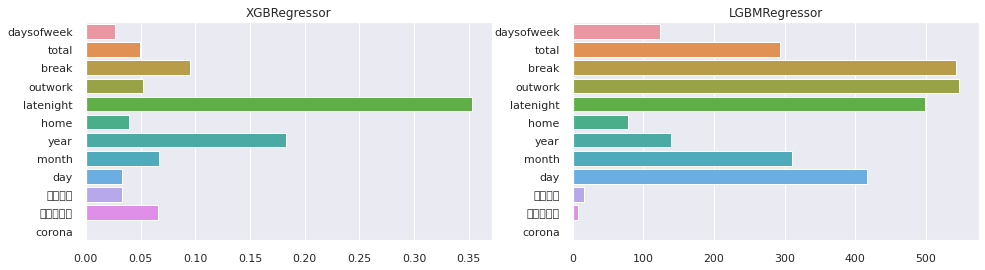

In [433]:
fit_score(data=train_test_중식, target='중식계', model_list=False, trial_name='중식_정리', DF=False)
fit_score(data=train_test_석식, target='석식계', model_list=False, trial_name='석식_정리', DF=False)
sco_df

In [ ]:
-----------------------------------------------------------

## 중식계
setup(data=X) , 이때 X는 KFold 처럼 X_train + y_train 데이터를 넣는다 ************** 주의

In [437]:
X_lunch = train_중식.drop('석식계', axis=1) # 귀찮아서 그냥 이름 바꿈
y_lunch = train_중식['중식계']
train_lunch = train_중식.drop(['중식계', '석식계'], axis=1)
test_lunch = test_중식.copy()

### 전처리 : setup()

In [438]:
reg_lunch = setup(data=X_lunch,                            #--------------------X_train 0.8
                    target='중식계',
                    train_size=0.8,      #default = 0.7
                    imputation_type='simple',    
                    #ignore_features=[],
                    data_split_shuffle=False,     
                    session_id=1414,     #random_state
                    fold_strategy='kfold',
                    fold=10,   
                    fold_shuffle=False,
                    verbose=True, 
                    silent= True
                 )

,Description,Value
0,session_id,1414
1,Target,중식계
2,Original Data,"(1162, 13)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(929, 33)"


### 모델비교 : compare_models()

In [439]:
#return Trained model depending on 'n_select'
top3_model = compare_models(sort='MAE',           #default 'R2'
                             n_select= 3,          #top-n
                             #--------
                             round=4,              #np.round(score)
                             cross_validation=True,
                             verbose=True,
                             errors='ignore'
                             #fold=None,           #n_splits’ parameter of the CV generator in the setup function.
                             #fit_kwargs: dict, default = {} (empty dict)
                            )

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,6.784580e+01,8.252312e+03,9.050870e+01,7.906000e-01,0.1121,0.0829,0.129
br,Bayesian Ridge,6.844130e+01,8.105894e+03,8.935810e+01,7.950000e-01,0.1105,0.0832,0.038
ridge,Ridge Regression,6.844460e+01,8.108199e+03,8.936050e+01,7.947000e-01,0.1105,0.0832,0.031
lr,Linear Regression,6.853930e+01,8.132832e+03,8.947890e+01,7.936000e-01,0.1106,0.0833,0.462
lasso,Lasso Regression,6.861460e+01,8.183453e+03,8.986170e+01,7.955000e-01,0.1117,0.0837,0.036
lightgbm,Light Gradient Boosting Machine,7.159850e+01,9.025337e+03,9.467610e+01,7.740000e-01,0.1190,0.0877,0.098
rf,Random Forest Regressor,7.320600e+01,9.705552e+03,9.814690e+01,7.566000e-01,0.1256,0.0912,0.710
et,Extra Trees Regressor,7.630600e+01,1.112845e+04,1.046359e+02,7.231000e-01,0.1331,0.0946,0.604
ada,AdaBoost Regressor,8.018190e+01,1.091558e+04,1.035933e+02,7.321000e-01,0.1292,0.0995,0.134
omp,Orthogonal Matching Pursuit,8.034530e+01,1.137627e+04,1.059730e+02,7.201000e-01,0.1352,0.0999,0.027


## 석식계

In [440]:
X_dinner = train_석식.drop('중식계', axis=1) # 귀찮아서 그냥 이름 바꿈
y_dinner = train_석식['석식계']
train_dinner = train_석식.drop(['중식계', '석식계'], axis=1)
test_dinner = test_석식.copy()

In [441]:
reg_dinner = setup(data=X_dinner,                           #--------------------X_train 0.8
            target='석식계',
            train_size=0.8,                                 #default = 0.7
            imputation_type='simple',    
            #ignore_features=[],
            data_split_shuffle=False,     
            session_id=1414,     #random_state
            fold_strategy='kfold',
            fold=10,   
            fold_shuffle=False,
            verbose=True, 
            silent= True
           )

,Description,Value
0,session_id,1414
1,Target,석식계
2,Original Data,"(1162, 14)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(929, 33)"


In [442]:
#return Trained model depending on 'n_select'
top3_model = compare_models(sort='MAE',           #default 'R2'
                             n_select= 3,          #top-n
                             #--------
                             round=4,              #np.round(score)
                             cross_validation=True,
                             verbose=True,
                             errors='ignore'
                             #fold=None,           #n_splits’ parameter of the CV generator in the setup function.
                             #fit_kwargs: dict, default = {} (empty dict)
                            )

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,45.4495,3631.4959,59.7930,0.5298,0.1380,0.1040,0.017
lr,Linear Regression,45.4993,3631.2870,59.7934,0.5264,0.1386,0.1039,0.016
lasso,Lasso Regression,47.5382,4030.2462,62.8773,0.4933,0.1462,0.1100,0.018
gbr,Gradient Boosting Regressor,47.8716,4135.8495,63.7089,0.4864,0.1472,0.1106,0.144
et,Extra Trees Regressor,48.6047,4306.8140,64.7380,0.4812,0.1504,0.1130,0.612
lightgbm,Light Gradient Boosting Machine,48.7783,4108.0677,63.2610,0.4916,0.1468,0.1121,0.102
rf,Random Forest Regressor,52.6149,4868.8532,69.0003,0.4040,0.1609,0.1227,0.714
en,Elastic Net,54.0741,5114.1943,70.3754,0.3723,0.1675,0.1282,0.017
huber,Huber Regressor,54.1505,5062.3123,69.2806,0.4009,0.1622,0.1268,0.064
br,Bayesian Ridge,56.1789,5498.5781,72.9422,0.3232,0.1739,0.1337,0.018


In [ ]:
# sub.to_csv("/content/gdrive/MyDrive/cafeteria/study3.csv", index=False)   

# OPTUNA

## 중식계 - XGBReg

In [445]:
pred = 0

In [446]:
# import optuna
def objectiveXGB(trial, X, y):
    # To select which parameters to optimize, please look at the XGBoost documentation:
    # https://xgboost.readthedocs.io/en/latest/parameter.html
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=1234)

    param = {
        "verbosity": 1,
        #'tree_method':'gpu_hist',  # colab or GPU 있는 경우만
        # 'lambda': trial.suggest_loguniform(
        #     'lambda', 1e-3, 10.0
        # ),
        'objective': 'reg:squarederror',  #'reg:linear', # 회귀
        #'metric': 'mae', 
        'max_depth': trial.suggest_int('max_depth',3, 30),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
        # 'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.7, 1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300 ),
        'alpha': trial.suggest_loguniform( 'alpha', 1e-3, 10.0),
        'random_state': 42
    }
    model = XGBRegressor(**param)  
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=25,verbose=False)
    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)

    return mae

In [447]:
studyXGB_lunch = optuna.create_study(direction='minimize')
#--- 중식계 ---
# study.optimize(objective, n_trials=100) 
studyXGB_lunch.optimize(lambda trial: objectiveXGB(trial, train_lunch, y_lunch), n_trials=100) 
print('study.best_params:'        , studyXGB_lunch.best_trial.value)
print('Number of finished trials:', len(studyXGB_lunch.trials))
print('Best trial:'               , studyXGB_lunch.best_trial.params)
print('study.best_params:'        , studyXGB_lunch.best_params)

[I 2022-03-23 06:09:11,308] A new study created in memory with name: no-name-6bfe783a-1a34-48b4-b6f2-e04808fd76ed
[I 2022-03-23 06:09:11,564] Trial 0 finished with value: 891.0446880452112 and parameters: {'max_depth': 19, 'learning_rate': 1.2193816811211817e-08, 'n_estimators': 2649, 'subsample': 0.734519772679089, 'min_child_weight': 34, 'alpha': 0.00343653872294975}. Best is trial 0 with value: 891.0446880452112.
[I 2022-03-23 06:09:16,152] Trial 1 finished with value: 890.8205812391805 and parameters: {'max_depth': 14, 'learning_rate': 1.8336585555319725e-07, 'n_estimators': 1338, 'subsample': 0.9121367786895348, 'min_child_weight': 190, 'alpha': 0.42990251976185595}. Best is trial 1 with value: 890.8205812391805.
[I 2022-03-23 06:09:21,301] Trial 2 finished with value: 131.24389098335234 and parameters: {'max_depth': 12, 'learning_rate': 0.00119123470047543, 'n_estimators': 1983, 'subsample': 0.8541096224814265, 'min_child_weight': 223, 'alpha': 0.003891034653853034}. Best is tria

study.best_params: 87.76409335811762
Number of finished trials: 100
Best trial: {'max_depth': 18, 'learning_rate': 0.00372152026041195, 'n_estimators': 1906, 'subsample': 0.8397956436637734, 'min_child_weight': 17, 'alpha': 7.773278346339917}
study.best_params: {'max_depth': 18, 'learning_rate': 0.00372152026041195, 'n_estimators': 1906, 'subsample': 0.8397956436637734, 'min_child_weight': 17, 'alpha': 7.773278346339917}


In [463]:
optuna.visualization.plot_param_importances(studyXGB_lunch)

In [460]:
best_params = studyXGB_lunch.best_params
opt_xgb =XGBRegressor(**(best_params))
opt_xgb.fit(train_lunch ,y_lunch)
pred = opt_xgb.predict(test_lunch)

[06:28:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [462]:
sub['중식계']=pred.reshape(-1,1)

## 석식계 - XGBReg

In [464]:
studyXGB_dinner = optuna.create_study(direction='minimize')
#--- 석식계 ---
# study.optimize(objective, n_trials=100) 
studyXGB_dinner.optimize(lambda trial: objectiveXGB(trial, train_dinner, y_dinner), n_trials=100) 
print('study.best_params:'        , studyXGB_dinner.best_trial.value)
sub['중식계']=pred.reshape(-1,1)print('Number of finished trials:', len(studyXGB_dinner.trials))
print('Best trial:'               , studyXGB_dinner.best_trial.params)
print('study.best_params:'        , studyXGB_dinner.best_params)

[I 2022-03-23 06:29:02,329] A new study created in memory with name: no-name-51a8ef3e-b9ad-45dc-a12f-9653e425c037
[I 2022-03-23 06:29:10,083] Trial 0 finished with value: 417.61315809912946 and parameters: {'max_depth': 28, 'learning_rate': 1.2598703951714436e-05, 'n_estimators': 2936, 'subsample': 0.9668506004144661, 'min_child_weight': 211, 'alpha': 0.01489969300926931}. Best is trial 0 with value: 417.61315809912946.
[I 2022-03-23 06:29:15,839] Trial 1 finished with value: 420.84401101206504 and parameters: {'max_depth': 11, 'learning_rate': 1.609435107107699e-05, 'n_estimators': 1926, 'subsample': 0.883263305899822, 'min_child_weight': 95, 'alpha': 0.004603715018856116}. Best is trial 0 with value: 417.61315809912946.
[I 2022-03-23 06:29:17,200] Trial 2 finished with value: 87.20808089751543 and parameters: {'max_depth': 19, 'learning_rate': 0.004315484233314688, 'n_estimators': 1563, 'subsample': 0.871917763258002, 'min_child_weight': 218, 'alpha': 9.021680943014864}. Best is tria

study.best_params: 68.4077185765868
Number of finished trials: 100
Best trial: {'max_depth': 19, 'learning_rate': 0.007253926741574097, 'n_estimators': 1218, 'subsample': 0.7001949614130133, 'min_child_weight': 5, 'alpha': 0.3920170362456131}
study.best_params: {'max_depth': 19, 'learning_rate': 0.007253926741574097, 'n_estimators': 1218, 'subsample': 0.7001949614130133, 'min_child_weight': 5, 'alpha': 0.3920170362456131}


In [465]:
optuna.visualization.plot_param_importances(studyXGB_dinner)

In [466]:
best_params = studyXGB_dinner.best_params
opt_xgb =XGBRegressor(**(best_params))
opt_xgb.fit(train_dinner ,y_dinner)
pred = opt_xgb.predict(test_dinner)

[06:34:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [467]:
sub['석식계']=pred.reshape(-1,1)

In [468]:
sub.to_csv("/content/gdrive/MyDrive/cafeteria/study4.csv", index=False)